In [2]:
# Importing some basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
# Handling Future Warning
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

### Read in the file and get basic information about the data, including numerical summaries.

In [4]:
df= pd.read_csv('bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

###### Data Dictionary:-
    ➡age: age (numeric)
    ➡ job: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self employed', 'services', 
           'student', 'unemployed', 'unknown'
    ➡salary: Numeric
    ➡marital: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
    ➡education: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 
                'university.degree', 'unknown'
    ➡targeted: 'yes', 'no' (Categorical)
    ➡default: has credit in default? ('no','yes','unknown')
    ➡balance: Numeric
    ➡housing: has housing loan? ('no','yes','unknown')
    ➡loan: has personal loan? ('no','yes','unknown')
    ➡contact: contact communication type (categorical: 'cellular','telephone')
    ➡day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    ➡month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    ➡duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target
               (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the
               end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and 
               should be discarded if the intention is to have a realistic predictive model.
    ➡ campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    ➡ pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means
             client was not previously contacted)
    ➡previous: number of contacts performed before this campaign and for this client (numeric)
    ➡poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    ➡response: y - has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [7]:
# 5 point description of Numerical Features
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


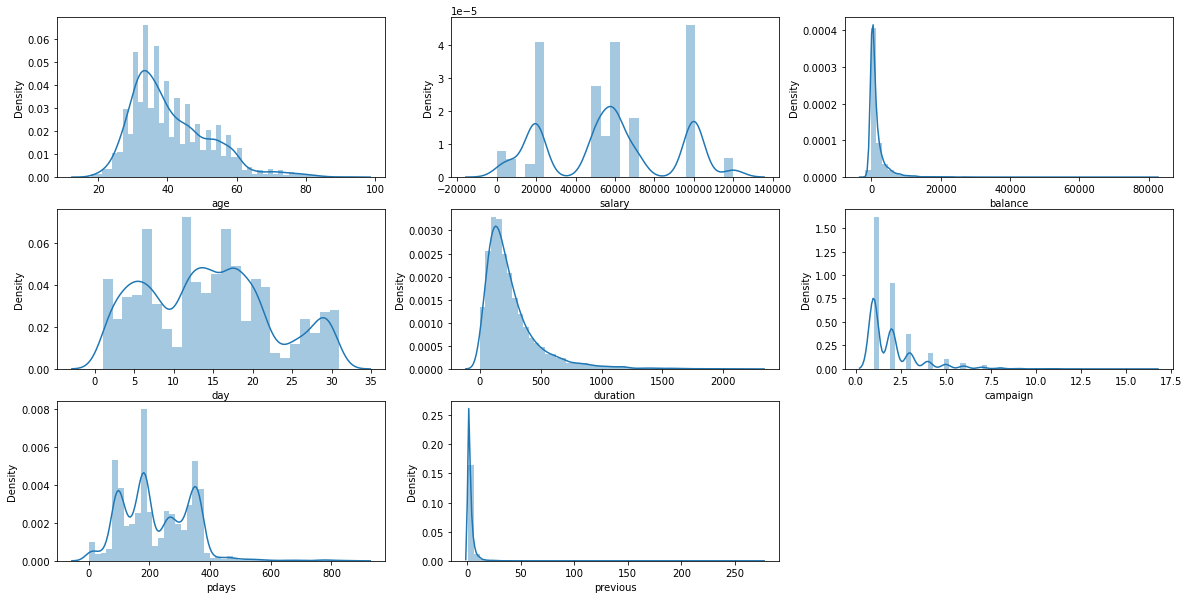

In [68]:
# Plotting Histogram Plot of Numerical Features

plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.distplot(df['age'], kde= True)

plt.subplot(3,3,2)
sns.distplot(df['salary'], kde= True)

plt.subplot(3,3,3)
sns.distplot(df['balance'], kde= True)

plt.subplot(3,3,4)
sns.distplot(df['day'], kde= True)

plt.subplot(3,3,5)
sns.distplot(df['duration'], kde= True)

plt.subplot(3,3,6)
sns.distplot(df['campaign'], kde= True)

plt.subplot(3,3,7)
sns.distplot(df['pdays'], kde= True)

plt.subplot(3,3,8)
sns.distplot(df['previous'], kde= True)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Observations:-
    ➡age: There is difference b/w mean & std, also 75% data is aged 48 means data is skewed towards Lower & Mid aged group.
    ➡salary: diff. b/w mean & median is very very high means data has uneven pattern within them.
    ➡balance: data is highly skewed towards zero balance as there is high deviation in IQR & there is huge diff. b/w mean &
      std. 
    ➡day: very huge difference b/w mean & std means data is not normaly distributed.
    ➡duration: although mean & std are nearly equal but there is diff. b/w mean & mode which lead to skewness.
    ➡campaign: although mean & mode are equal but mean is very far from maximum so there is skewness in data.
    ➡pdays: 
    ➡previous: 

#### Describe the pdays column, make note of the mean, median & minimum values. Anything fishy in the values?

In [161]:
# Description of pdays
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Text(0.5, 1.0, 'Distribution of pdays')

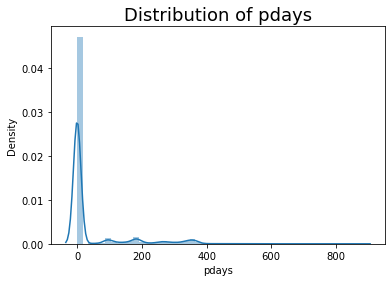

In [10]:
# Displot of pdays
sns.distplot(df['pdays'])
plt.title("Distribution of pdays", size=18)

### Observations:-
    ➡Mean= 40.19, Median= -1, Minimum= -1
    ➡-1 has mazority of instances, other data are very less in count.
    ➡Data is skewed towards -1

#### Describe the pdays column again, limiting to the relevant values of pdays. How different are the mean & the median values?

In [94]:
# Limiting pdays to only +Ve values
df= df.loc[df['pdays'] != -1]

In [7]:
df['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Text(0.5, 1.0, 'Distribution of Relevant pdays')

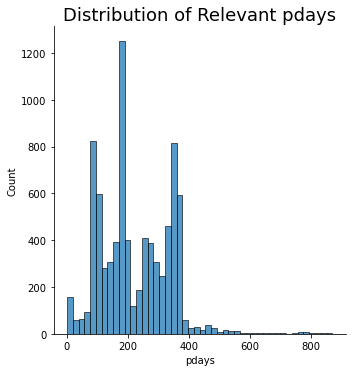

In [14]:
# Plotting pdays != -1
sns.displot(df['pdays'])
plt.title("Distribution of Relevant pdays", size=18)

### Observations:-
    ➡Mean= 224.57, Median= 194, Minimum= 1
    ➡Difference b/w Mean & Median has significantly reduced once pdays are limited to +Ve values.
    ➡Std is still very far from mean because mean doesn't lies in exact middle of minimum & maximum.

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group 
### has the highest median?

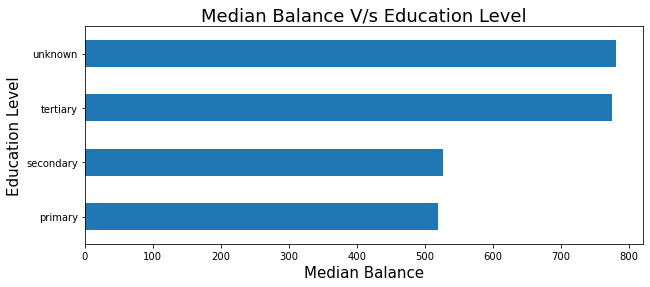

In [281]:
# Plotting
df.groupby(['education'])['balance'].median().sort_values().plot.barh(plt.figure(figsize=(10,4)))
plt.xlabel("Median Balance", size=15)
plt.ylabel("Education Level", size=15)
plt.title("Median Balance V/s Education Level", size=18)
plt.show()

### Observations:-
    ➡Median Balance of Unknown Education Level is Highest. 

### Make a box plot for pdays. Do you see any outliers?

Text(0.5, 1.0, 'Outlier Detection of pdays')

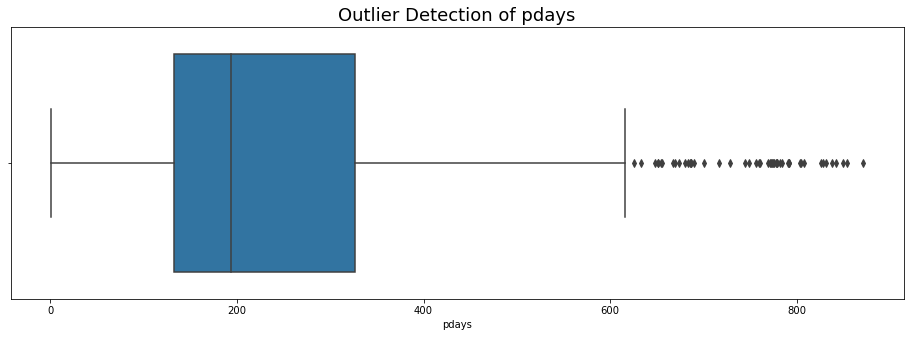

In [282]:
# Box Plot for pdays 
plt.figure(figsize=(16,5))
sns.boxplot(x= df['pdays'])
plt.title("Outlier Detection of pdays", size=18)

### Observations:-
    ➡ Yes, we can see the Outliers are present in the pdays data from above Boxplot

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.
##### First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we  used for the EDA discussion.

####  Convert the response variable to a convenient form.

In [95]:
# Replacing the Response Label to 1 & 0.
df.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [9]:
# Checking for Value counts Target Class
print(df.response.value_counts())
print('We have imbalance dataset')

0    6352
1    1905
Name: response, dtype: int64
We have imbalance dataset


##### Make suitable plots for associations with numerical features and categorical features’

In [186]:
# Seperating object and numerical data types 
obj = []
num = []
for col in df.columns:
    if df[col].dtype=='object':
        obj.append(col)
    else:
        num.append(col)

In [187]:
print("Object data type features ",obj)
print("Numerical data type features ",num)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


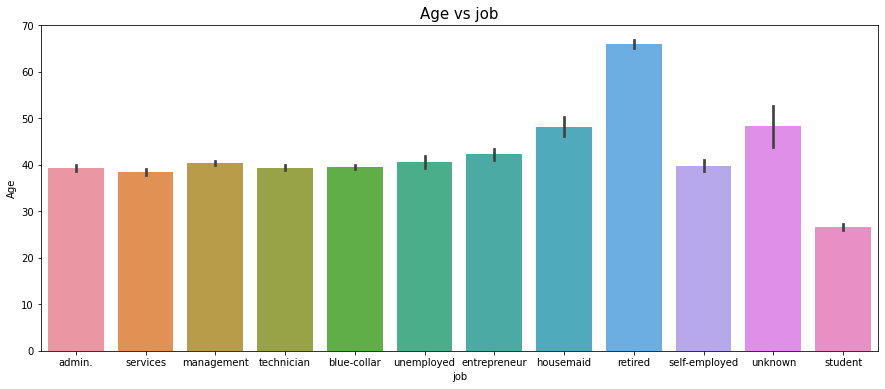

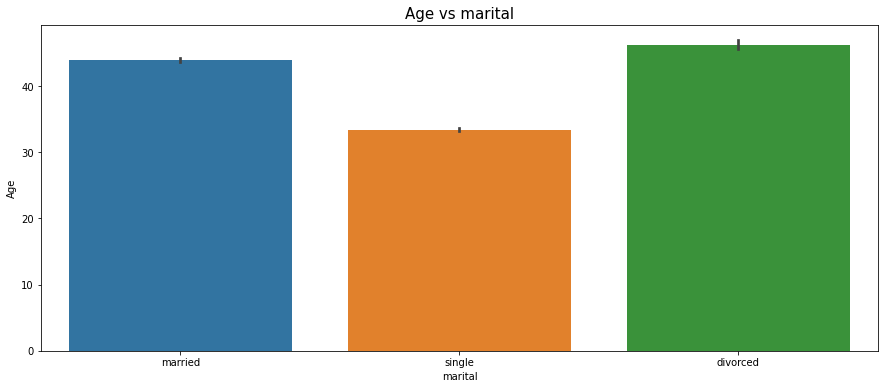

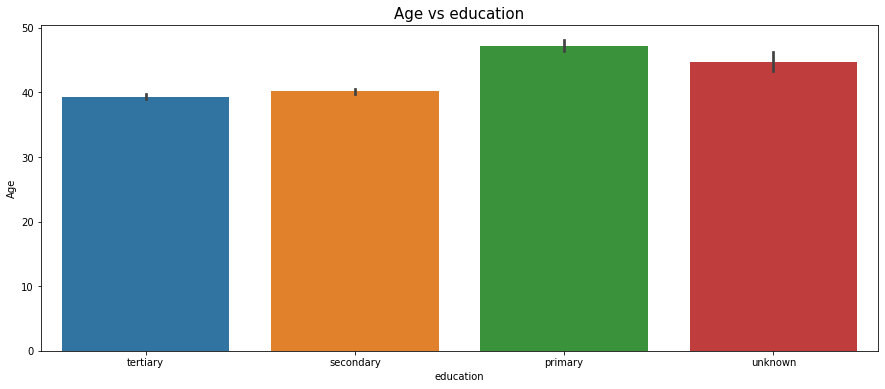

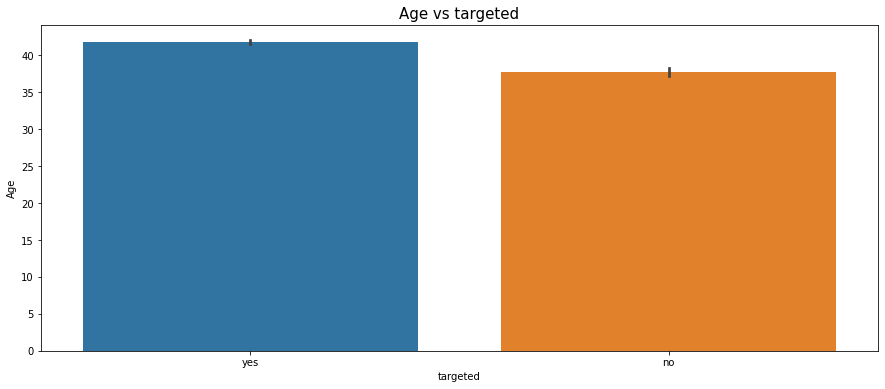

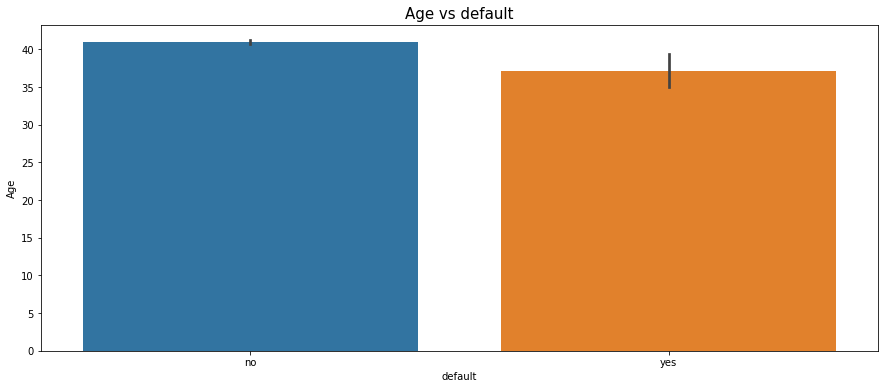

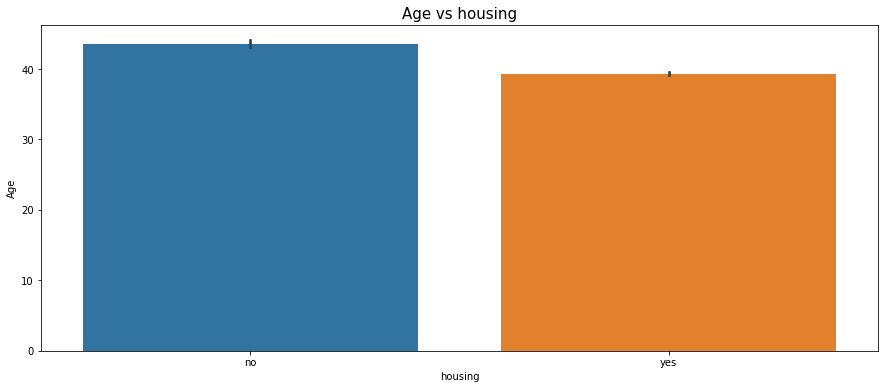

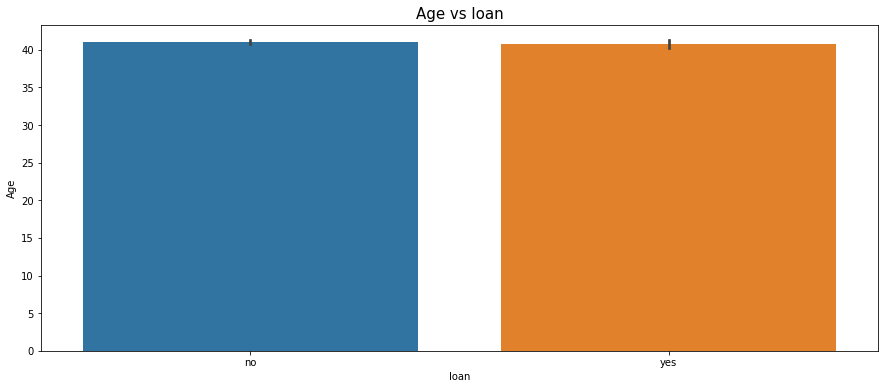

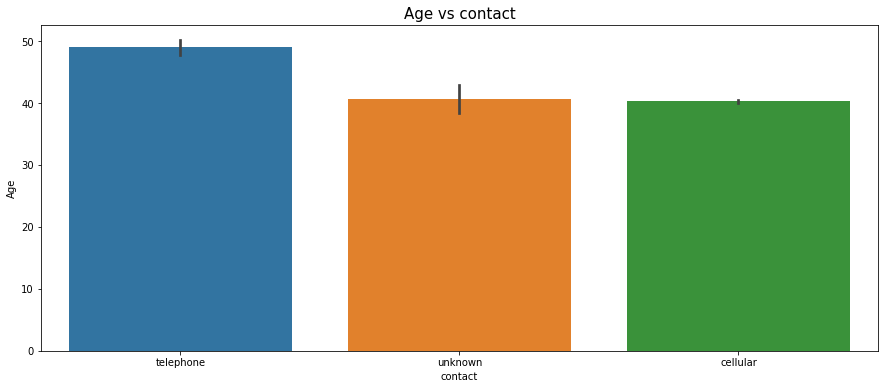

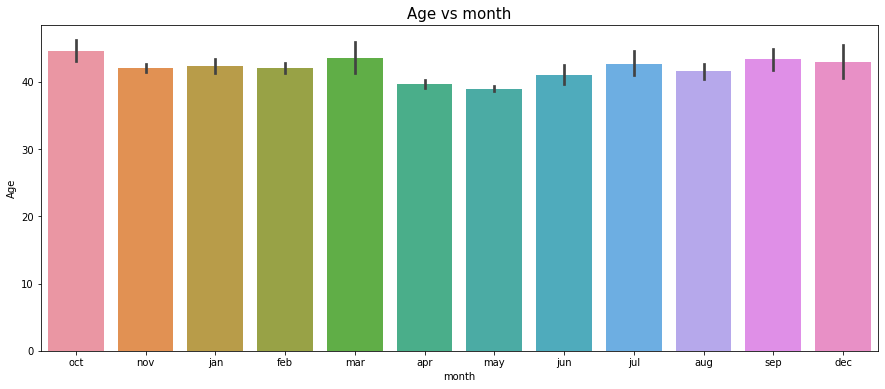

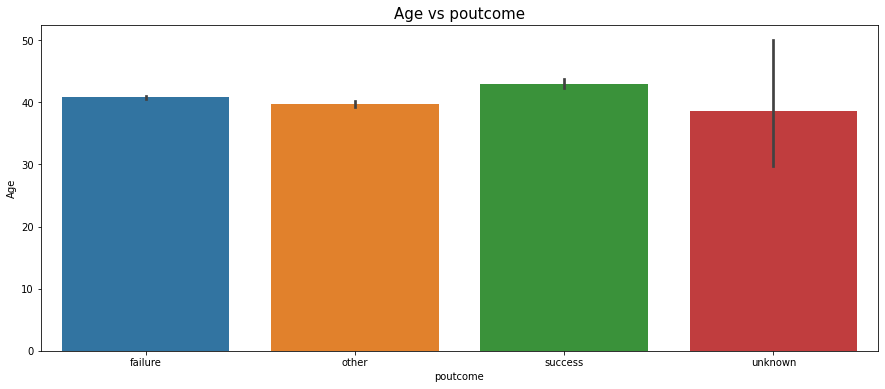

In [287]:
# Age V/s Categorical Features

for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["age"])
    plt.title("Age vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Age",fontsize=10)
    plt.show()

### Observations:-
    * Retired -> Maximum Average Age, Student-> Minimum Average Age
    * Divorced-> Maximum Average Age, Single-> Minimum Average Age
    * Primary Educated-> Maximum Average Age, Tertiary Educated-> Minimum Average Age
    * Targeted Group-> High Average Age, Non-targeted Group-> Low Average Age
    * Defaulter-> Low Average Age, Not- Defaulter-> High Average Age
    * Person with Housing Loan-> Low Average Age than Person not with housing loan

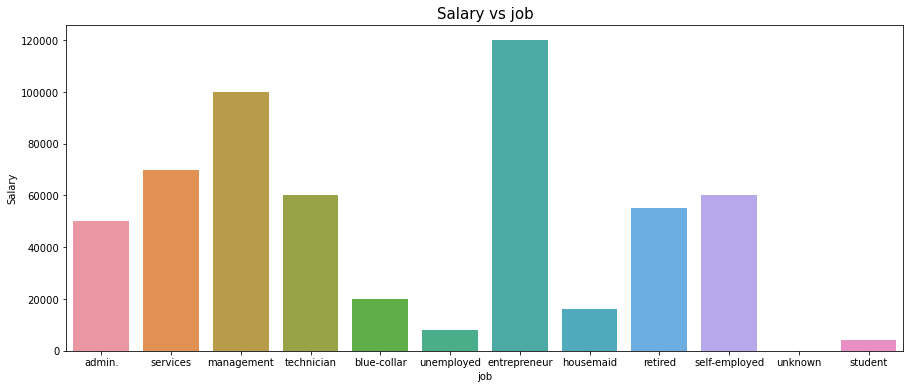

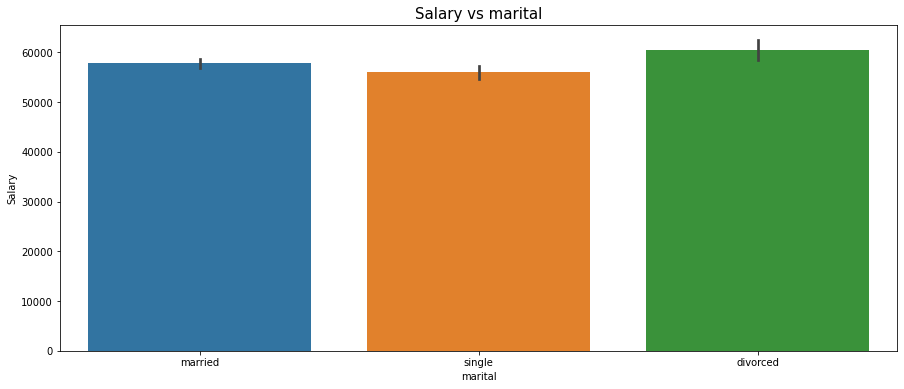

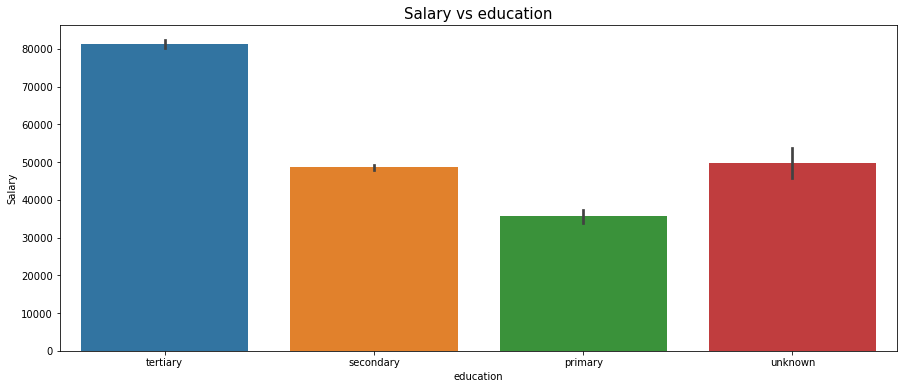

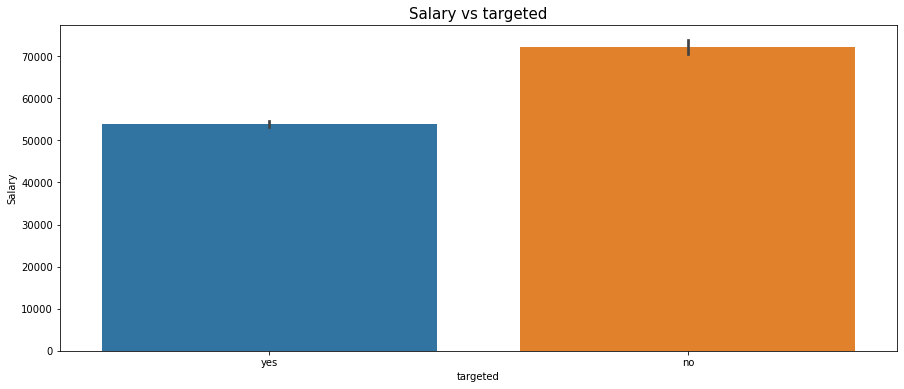

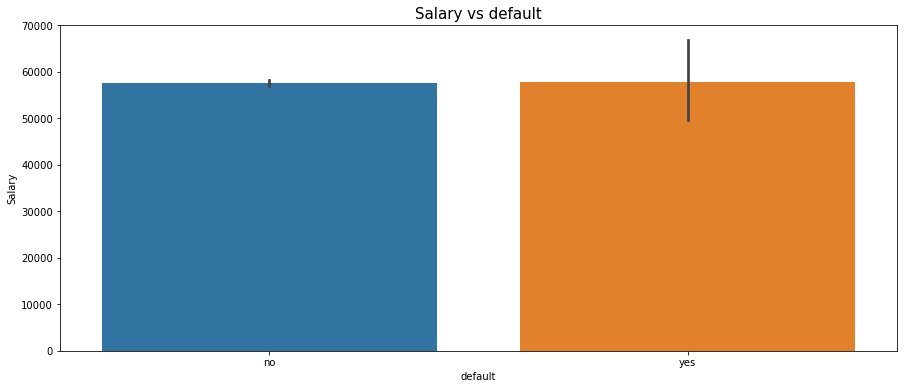

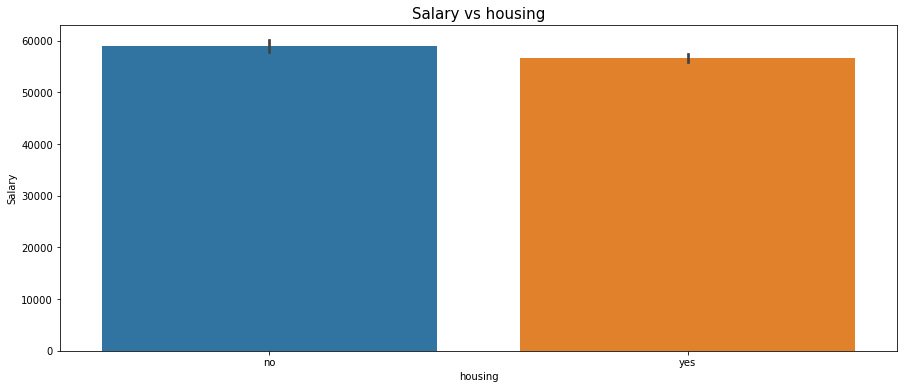

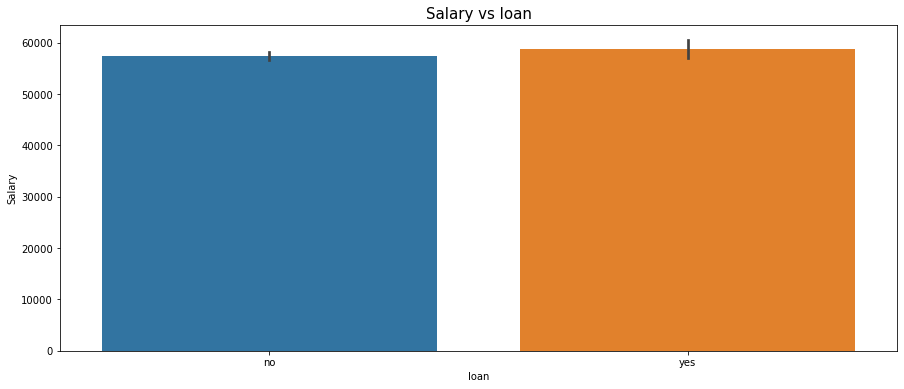

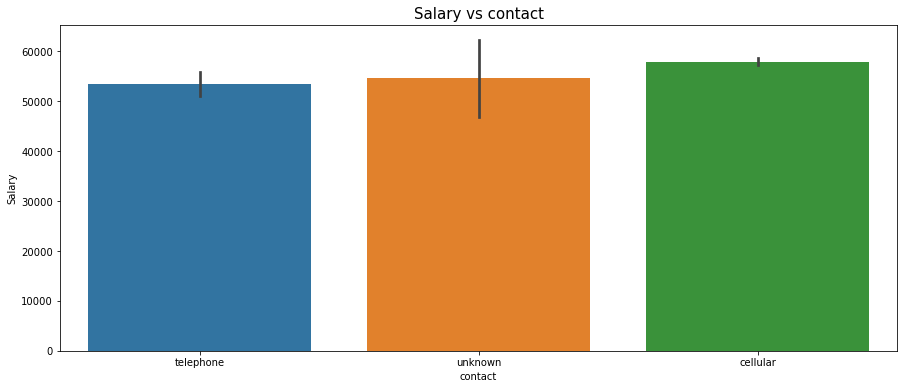

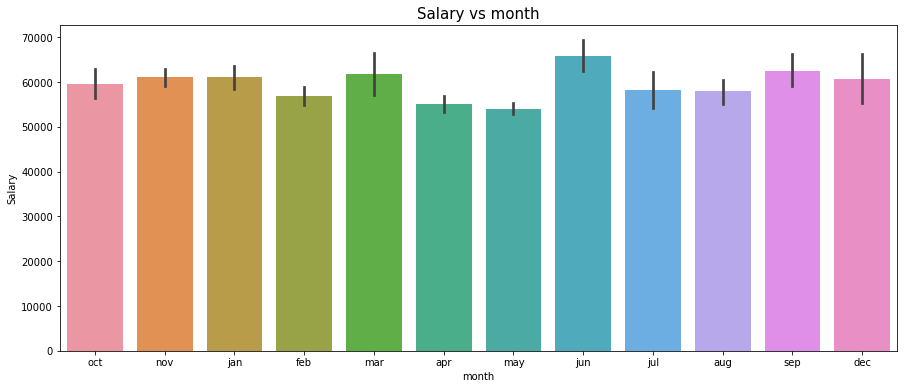

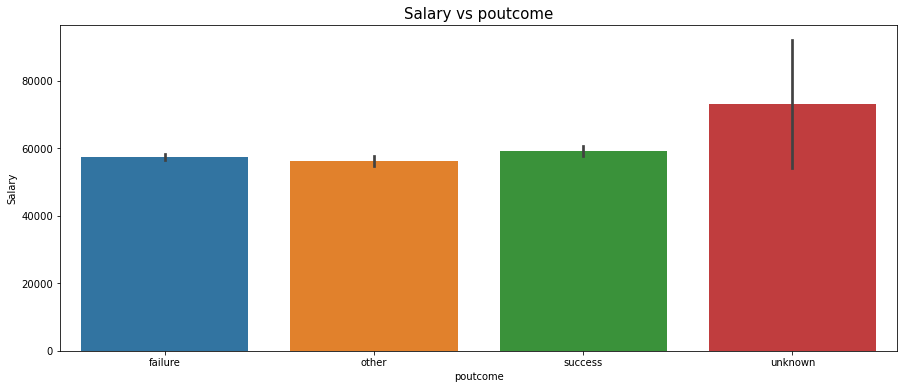

In [288]:
# Salary V/s Categorical Features
for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["salary"])
    plt.title("Salary vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Salary",fontsize=10)
    plt.show()

### Observations:-
    * Entrepreneur-> Highest Average Salary, Unknown-> Zero Average Salary.
    * Divorced-> Highest Average Salary, Married-> Lowest Average Salary.
    * Tertiary Educated Group-> Highest Average Salary, Primary Educated Group-> Zero Average Salary.
    * Not-Targeted group-> Highest Average Salary, Targeted group-> Zero Average Salary.(Contextual)

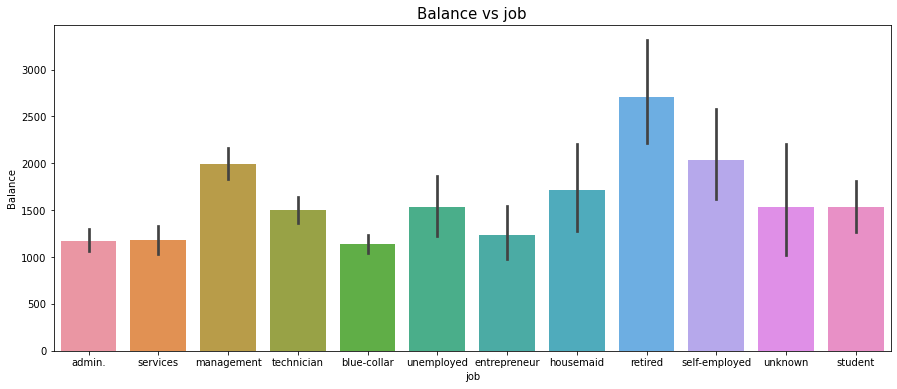

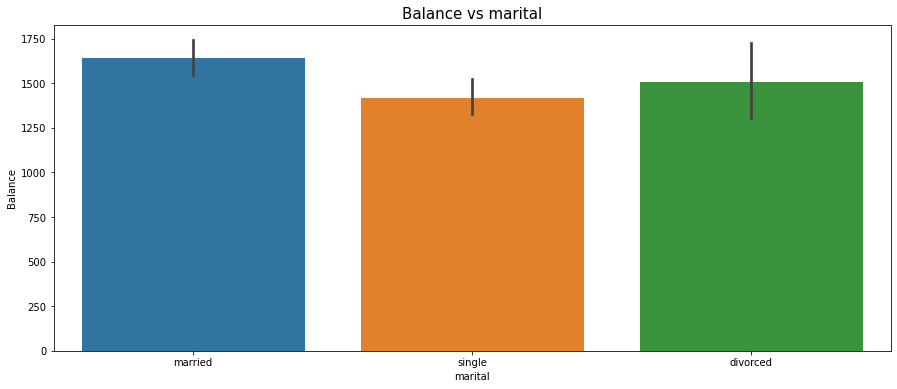

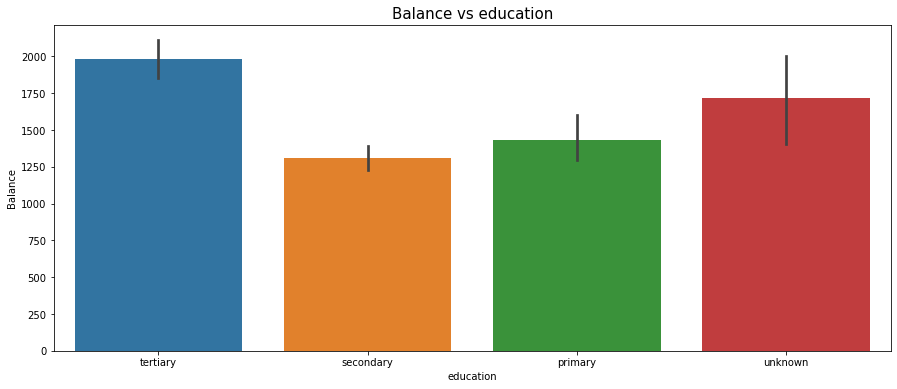

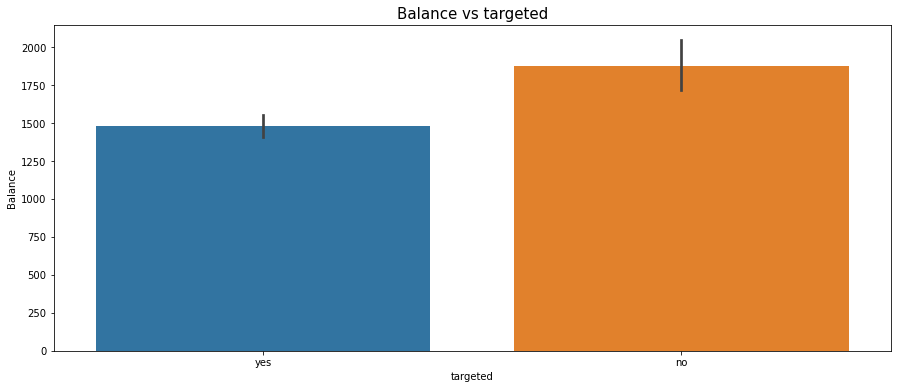

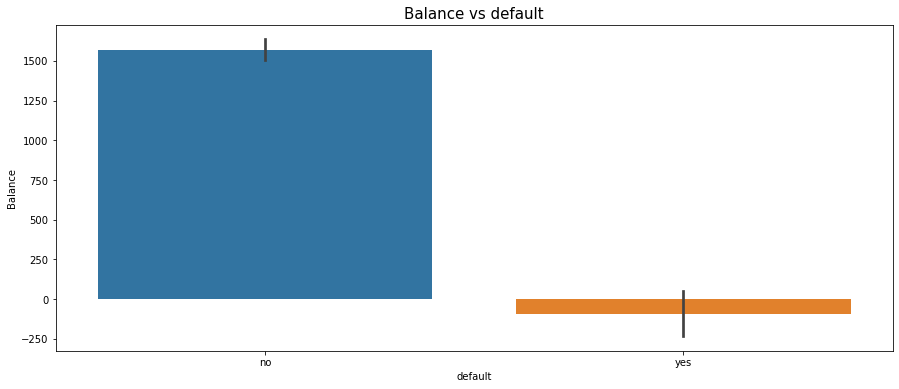

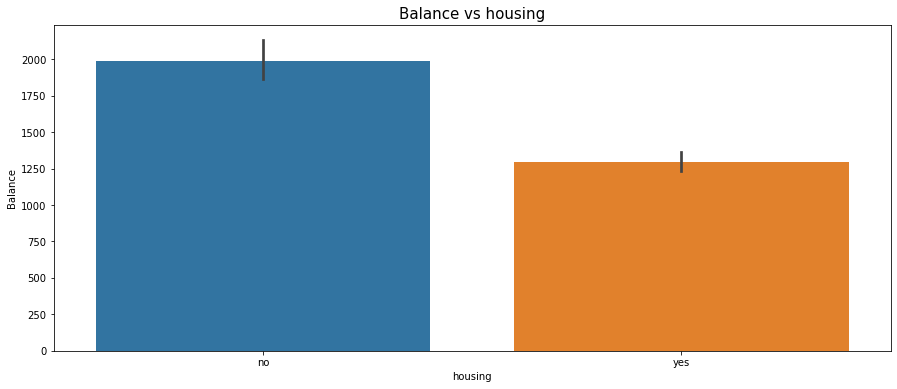

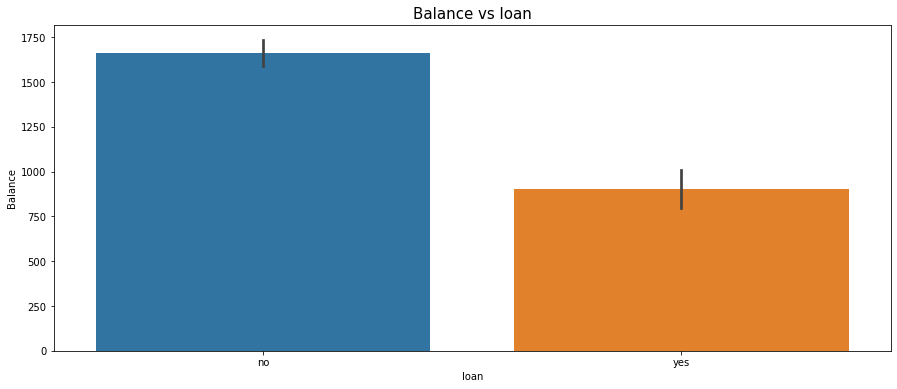

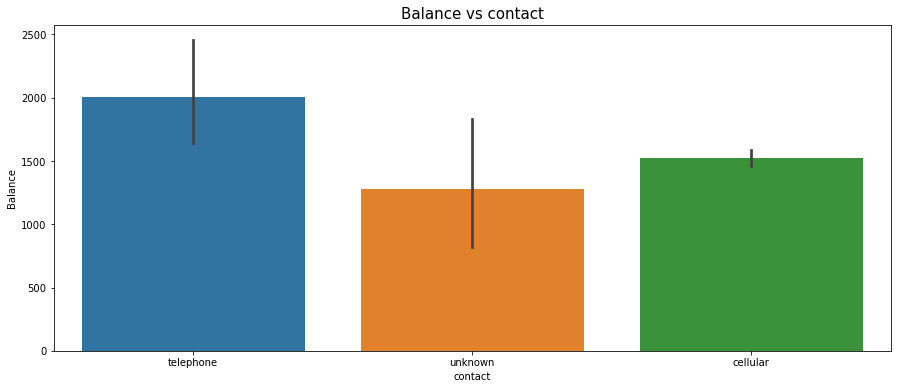

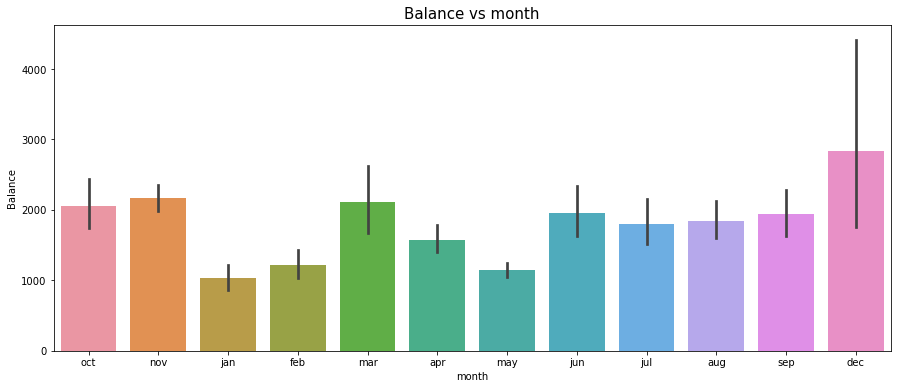

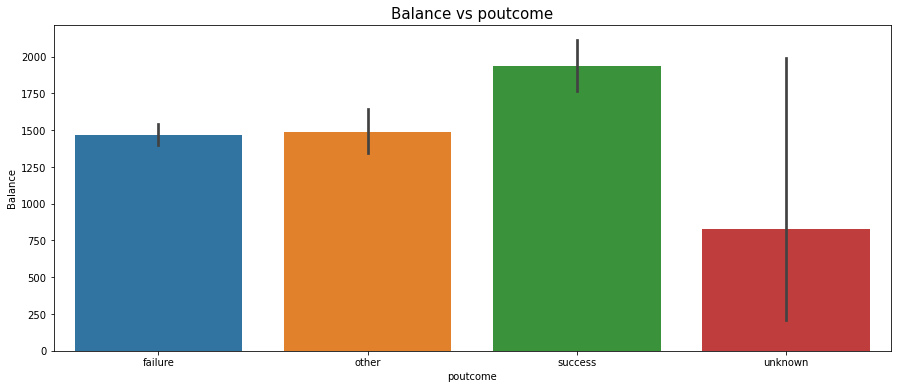

In [289]:
# Balance V/s Categorical Features
for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["balance"])
    plt.title("Balance vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Balance",fontsize=10)
    plt.show()

### Observations:-
    * Retired People-> Highest Average Balance, Service People-> Lowest Average Balance.
    * Married-> Highest Average Balance, Divorced-> Lowest Average Balance.
    * Tertiary Educated Group-> Highest Average Balance, Secondary Educated Group-> Lowest Average Balance.
    * Defaulter-> Negative Balance.

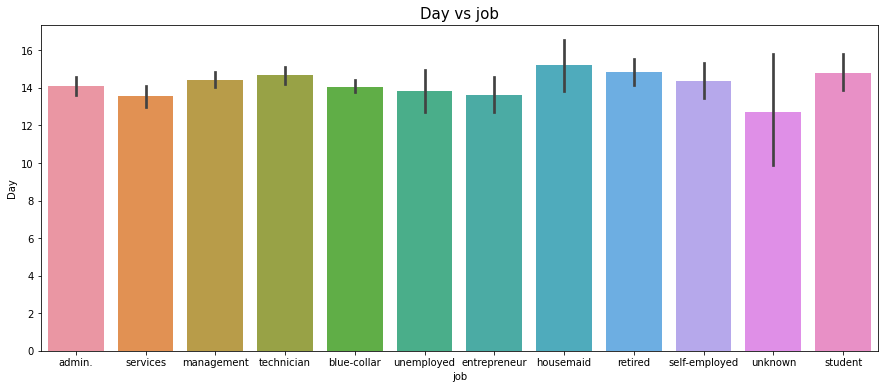

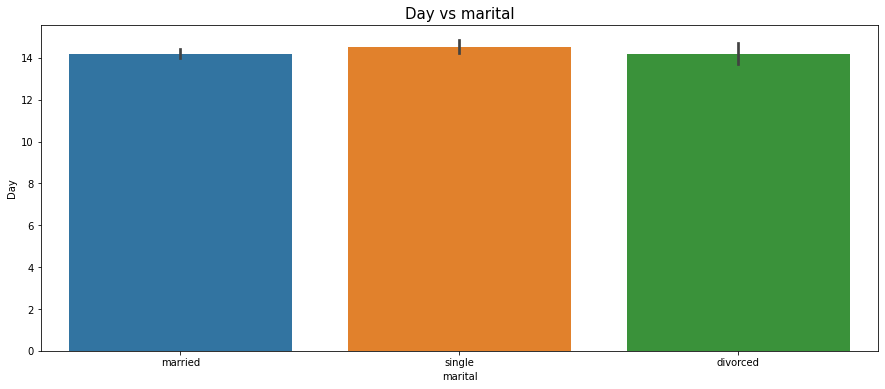

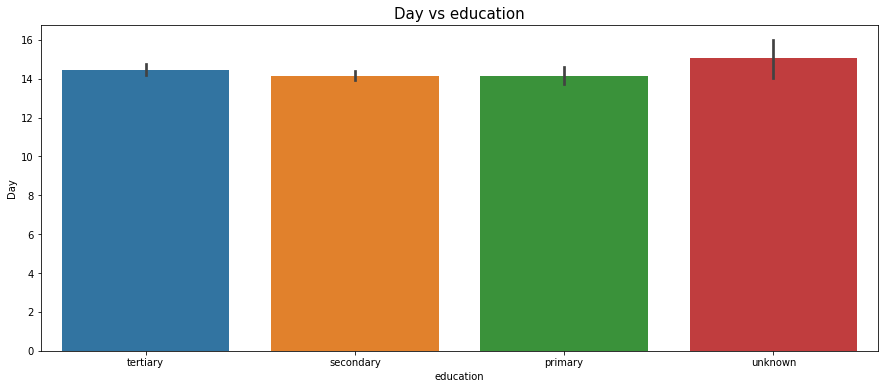

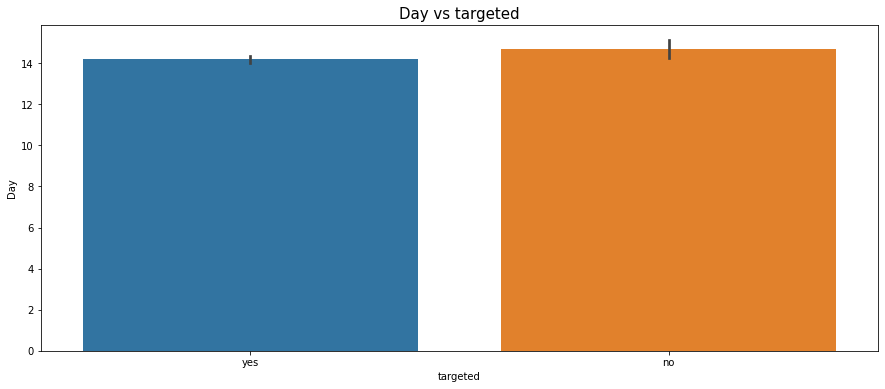

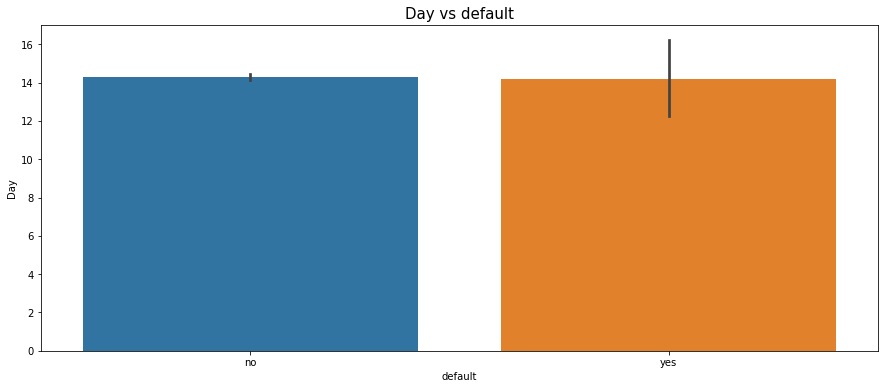

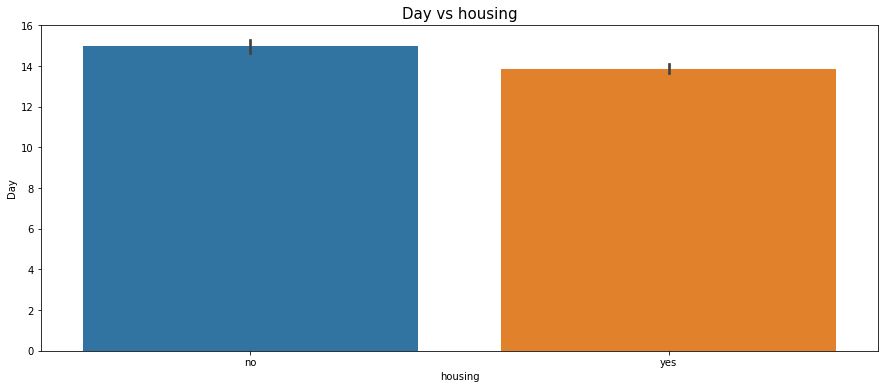

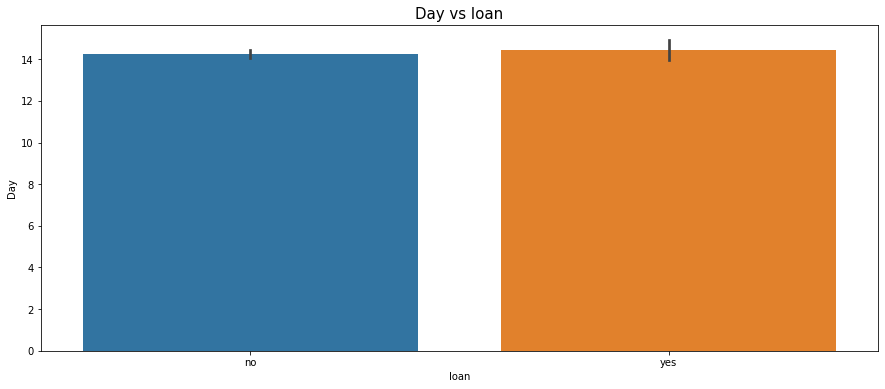

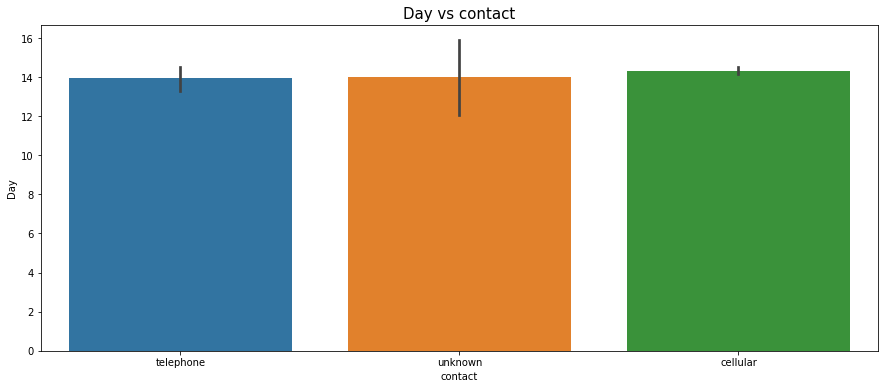

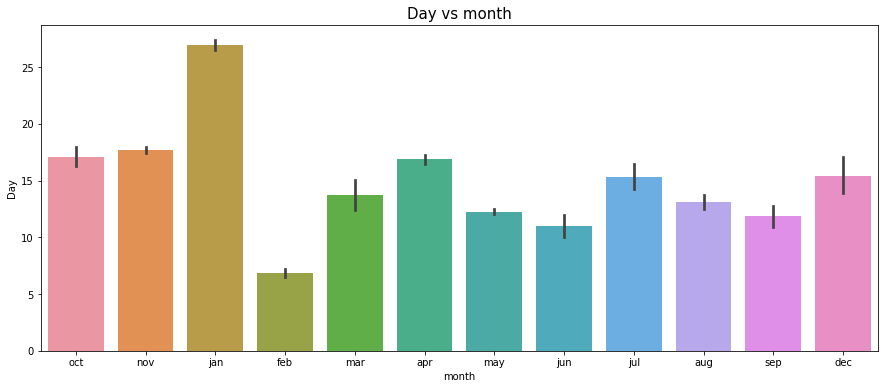

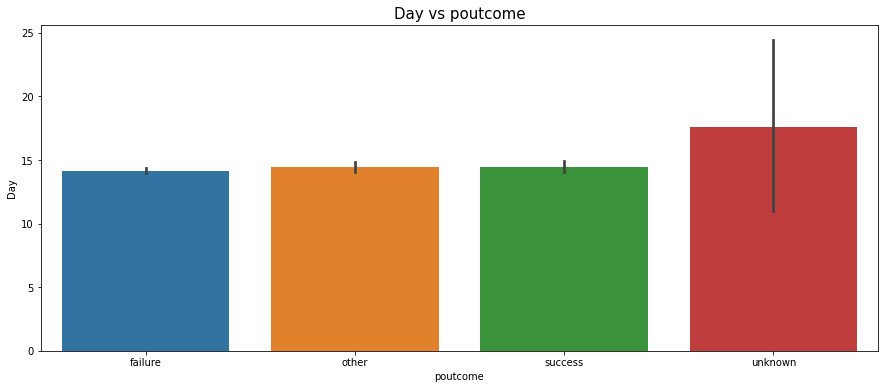

In [290]:
# Day V/s Categorical Features
for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["day"])
    plt.title("Day vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Day",fontsize=10)
    plt.show()

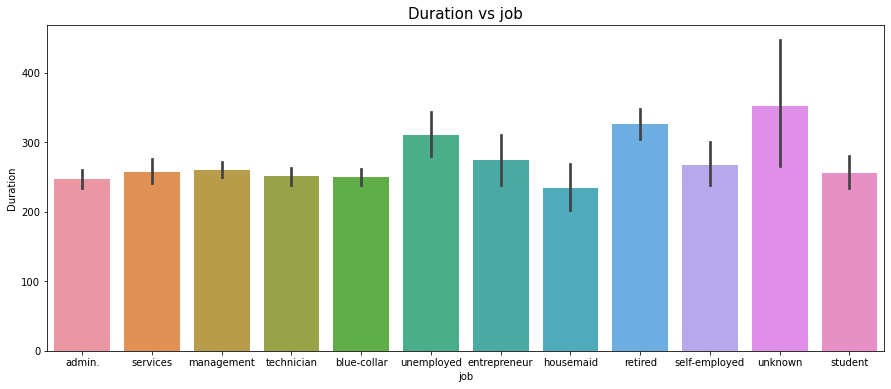

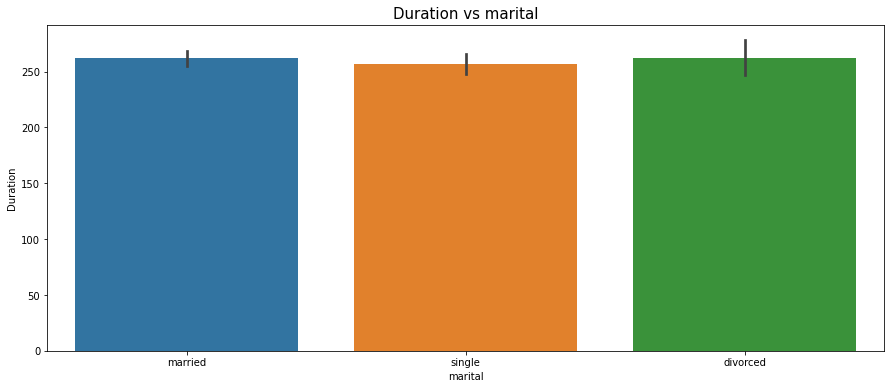

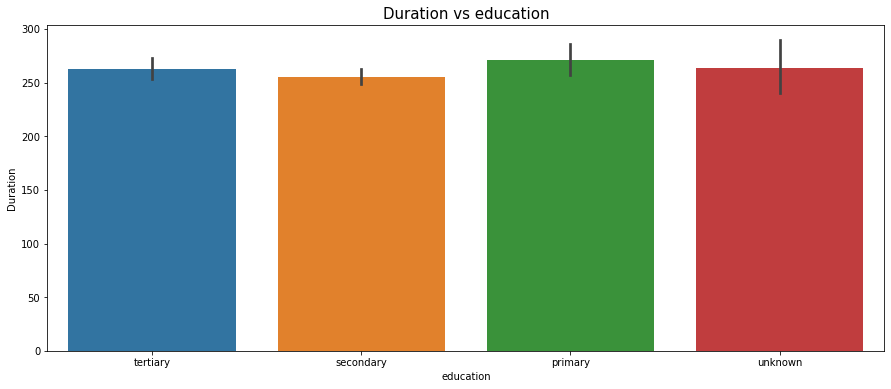

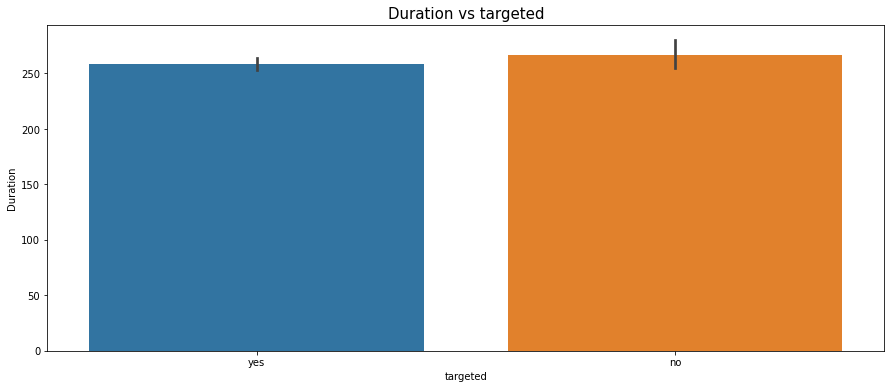

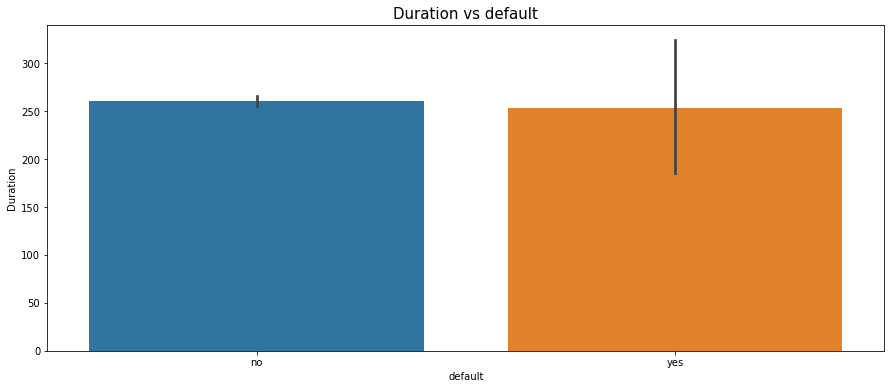

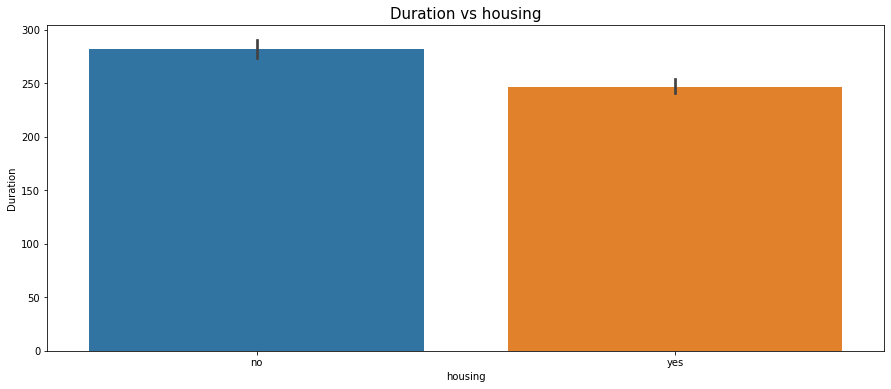

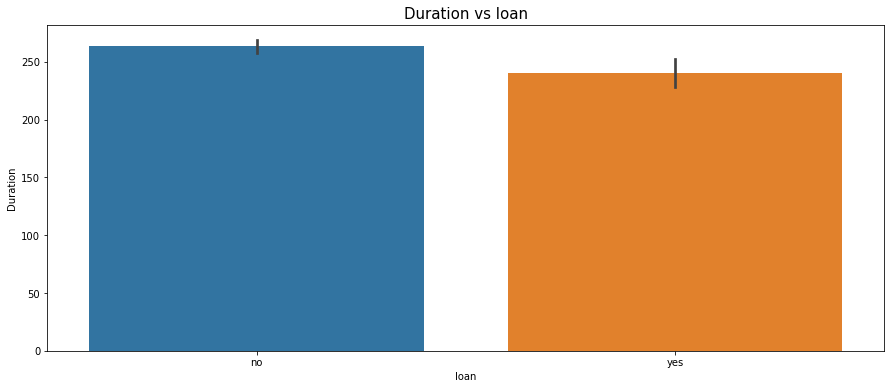

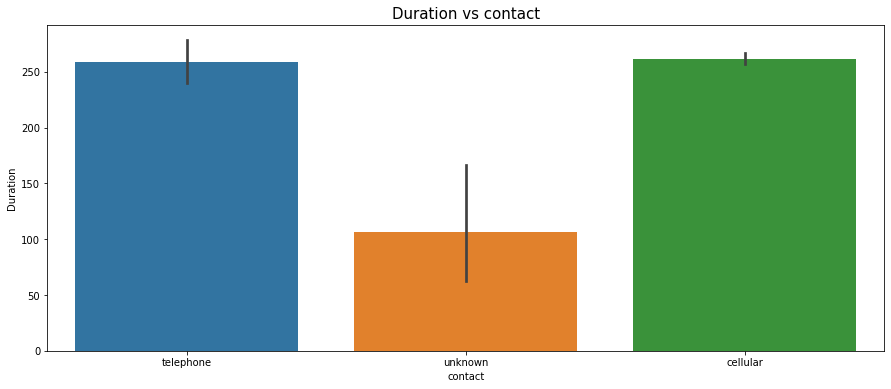

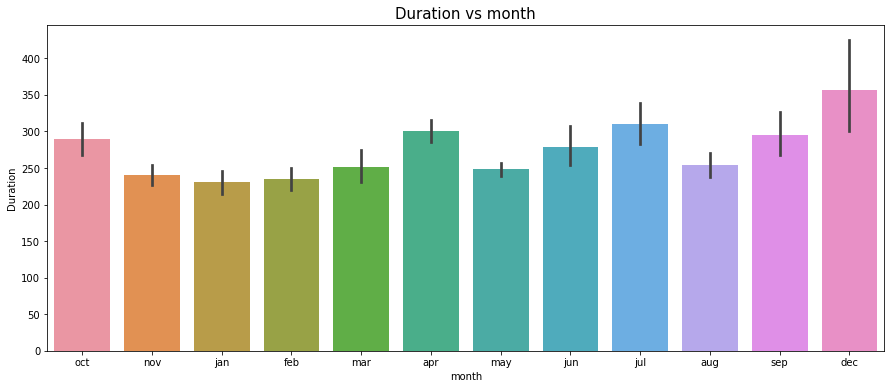

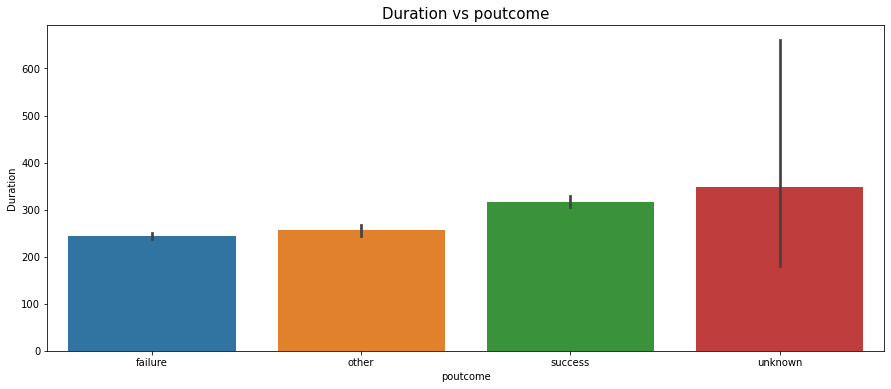

In [291]:
# Duration V/s Categorical Features
for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["duration"])
    plt.title("Duration vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Duration",fontsize=10)
    plt.show()

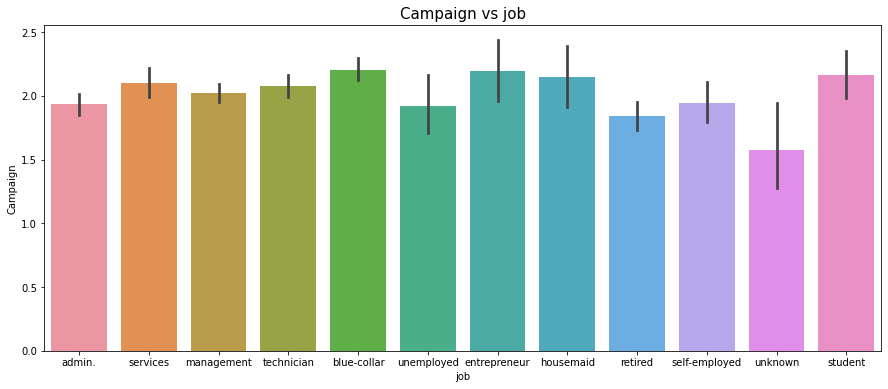

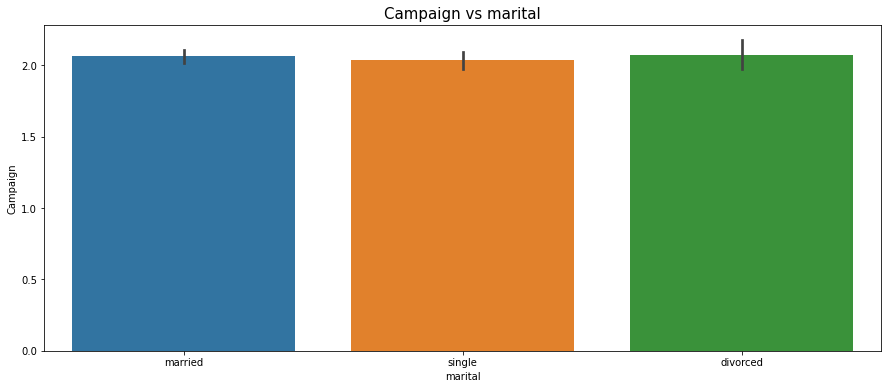

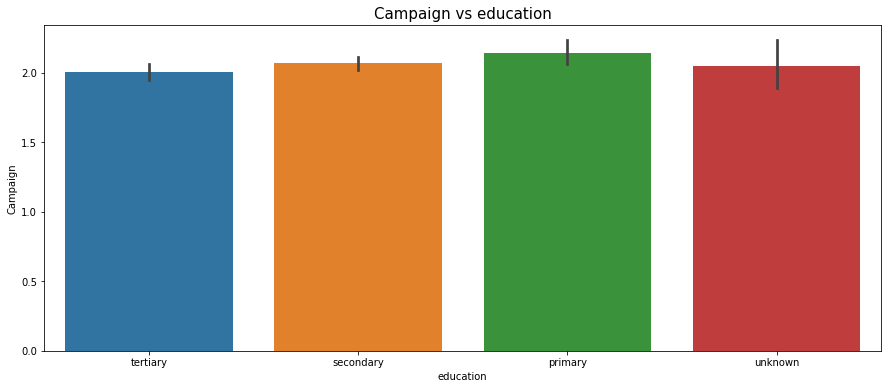

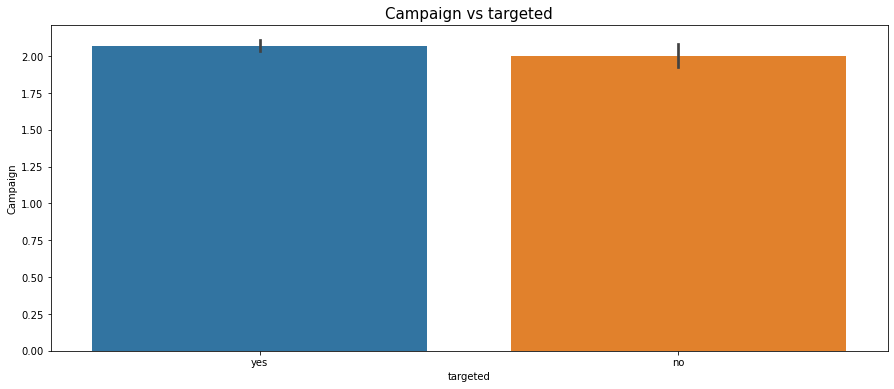

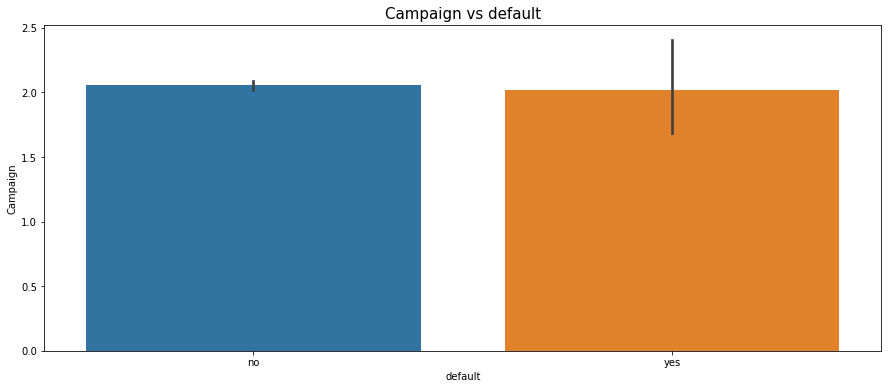

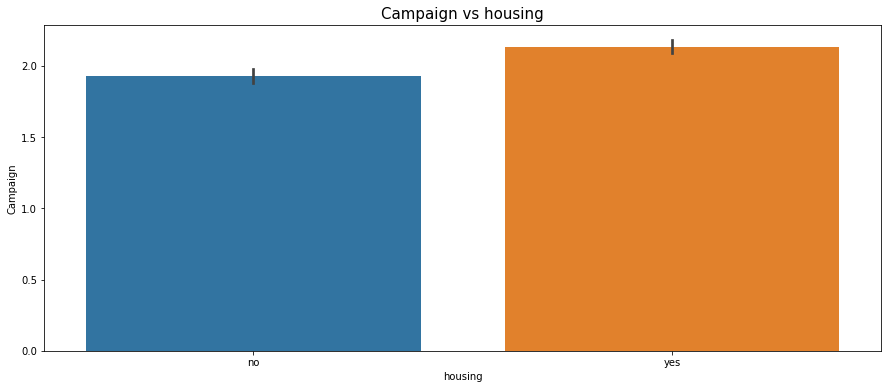

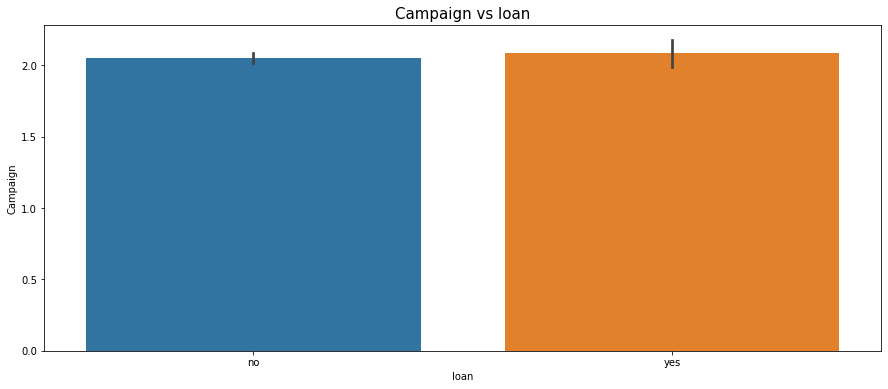

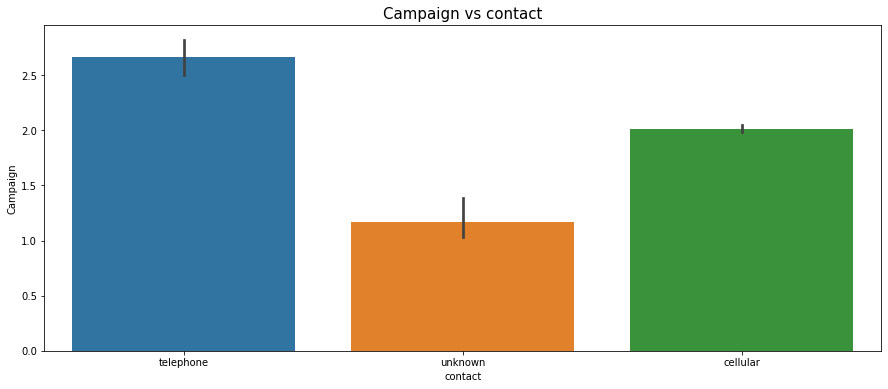

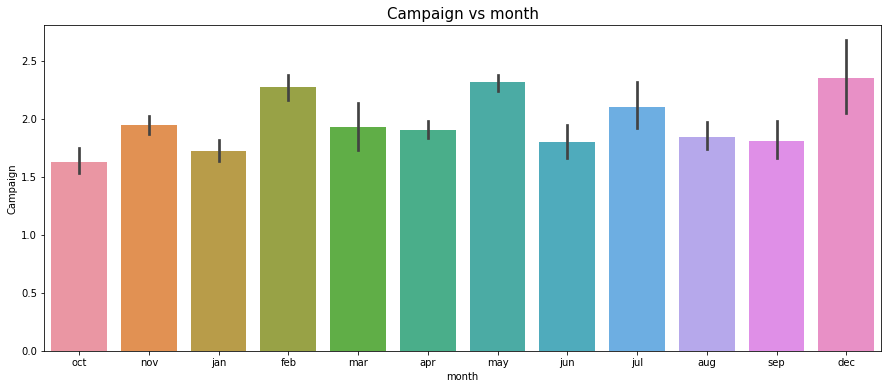

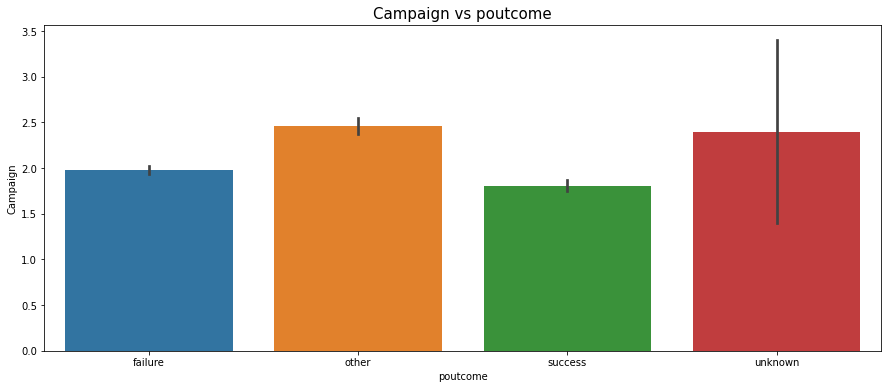

In [292]:
# Campaign V/s Categorical Features

for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["campaign"])
    plt.title("Campaign vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Campaign",fontsize=10)
    plt.show()

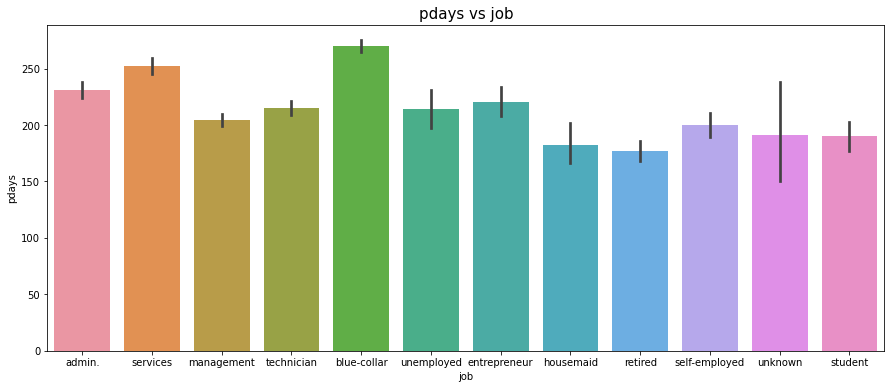

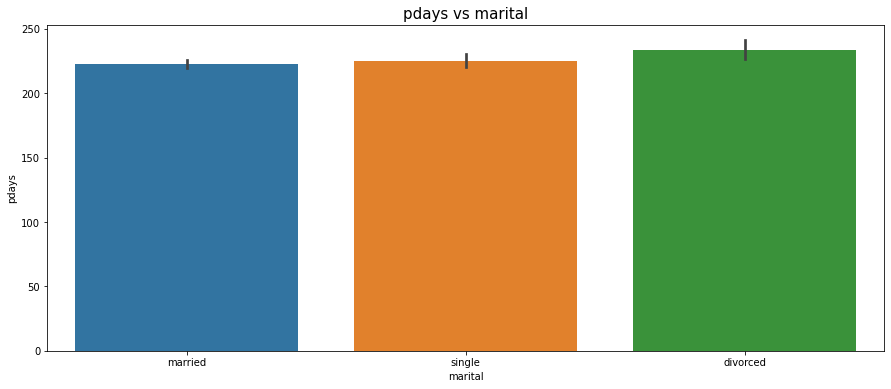

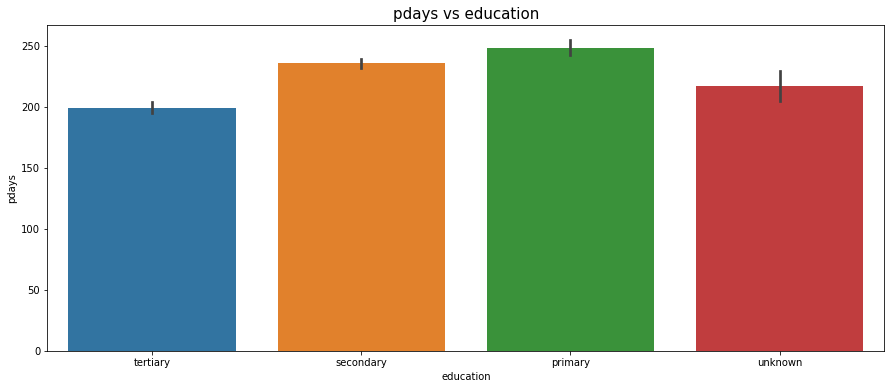

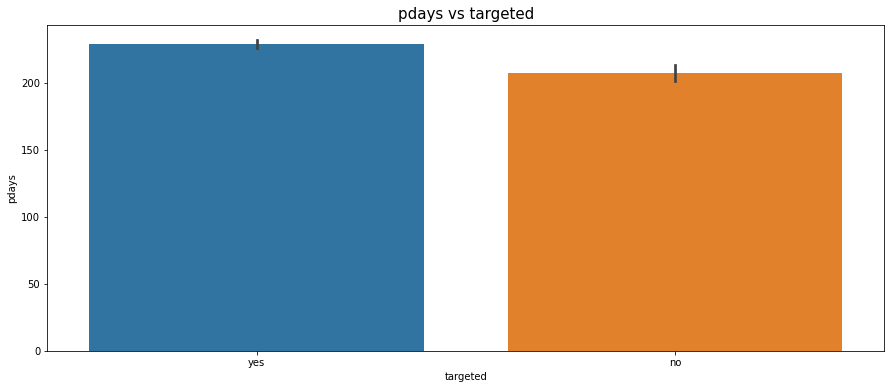

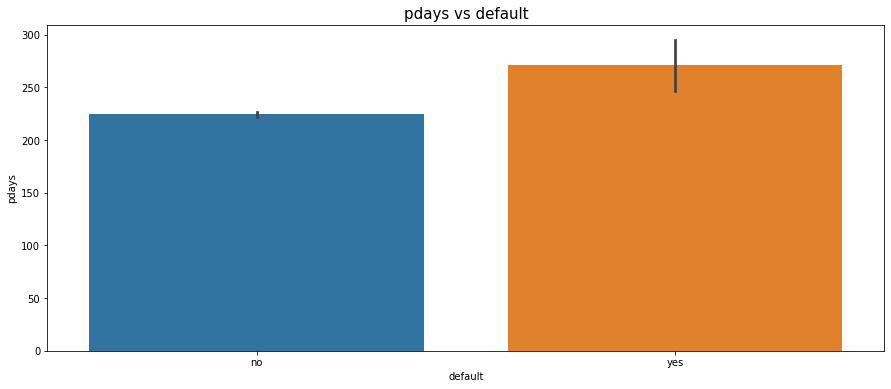

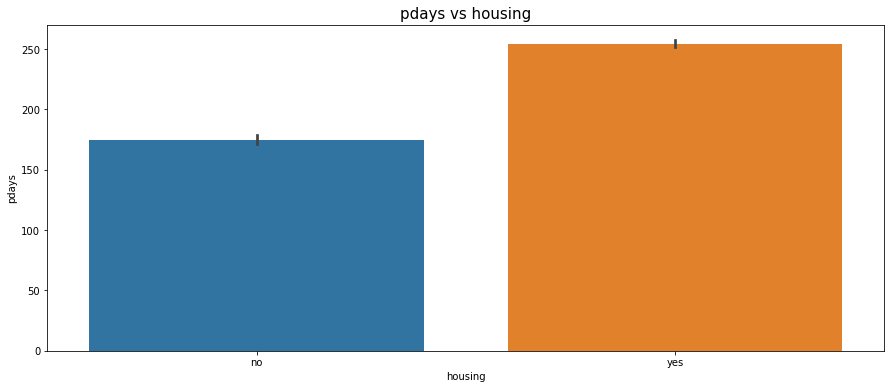

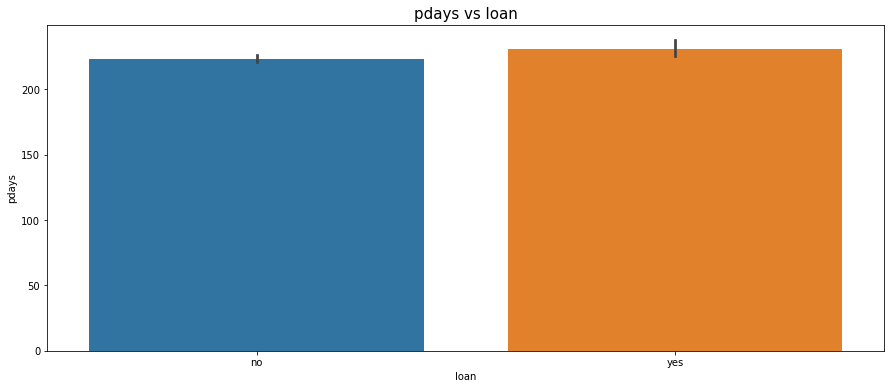

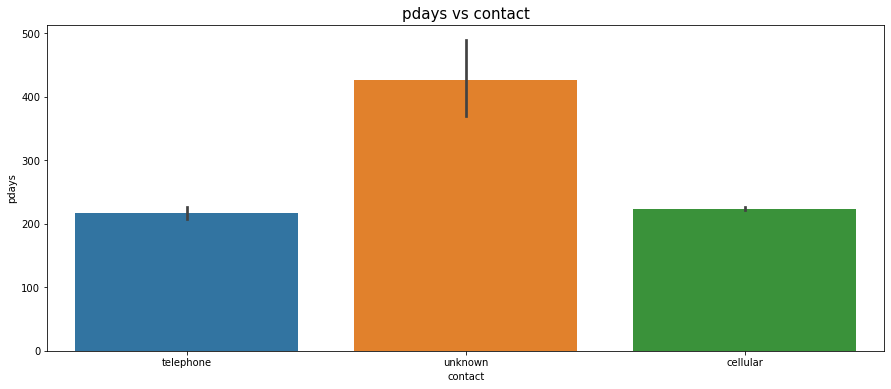

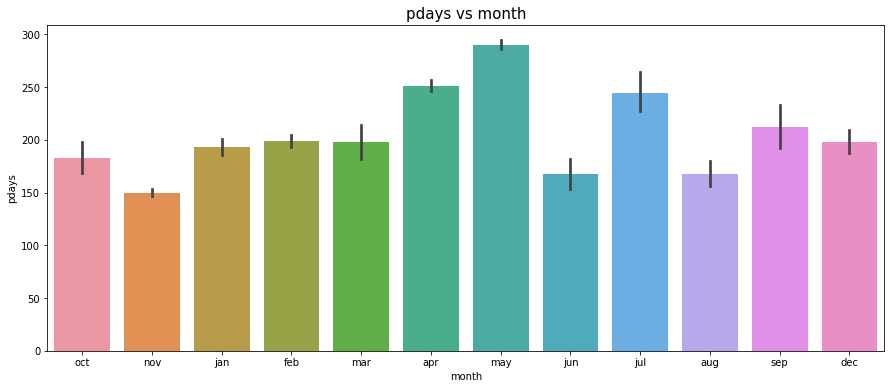

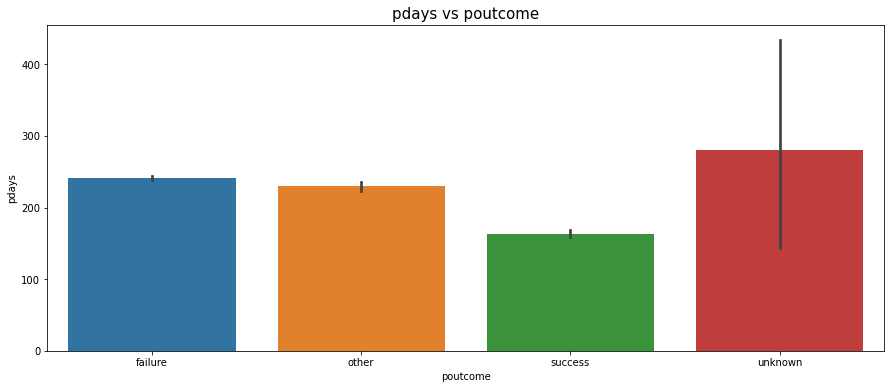

In [293]:
# pdays V/s Categorical Features
for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["pdays"])
    plt.title("pdays vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("pdays",fontsize=10)
    plt.show()

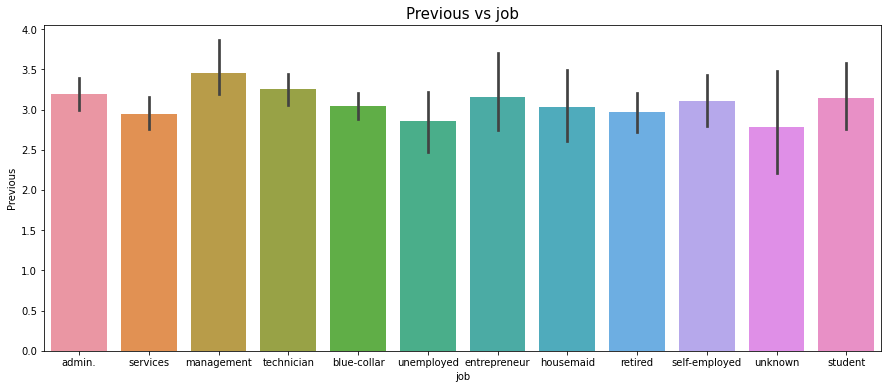

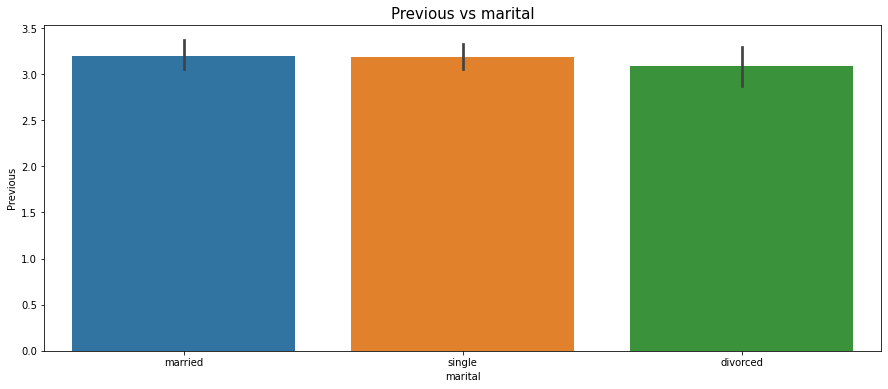

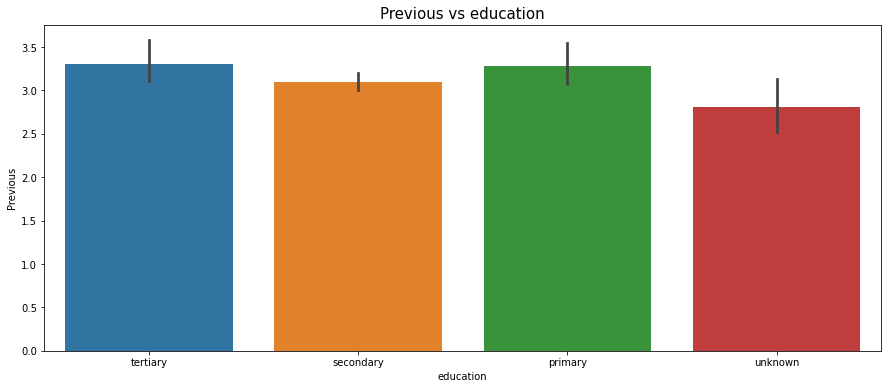

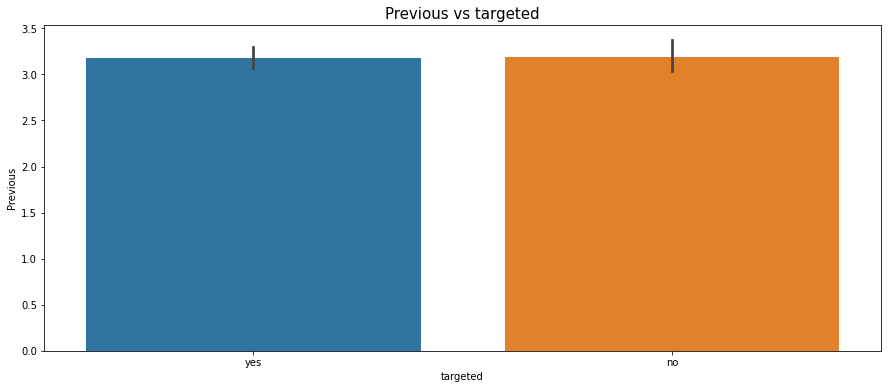

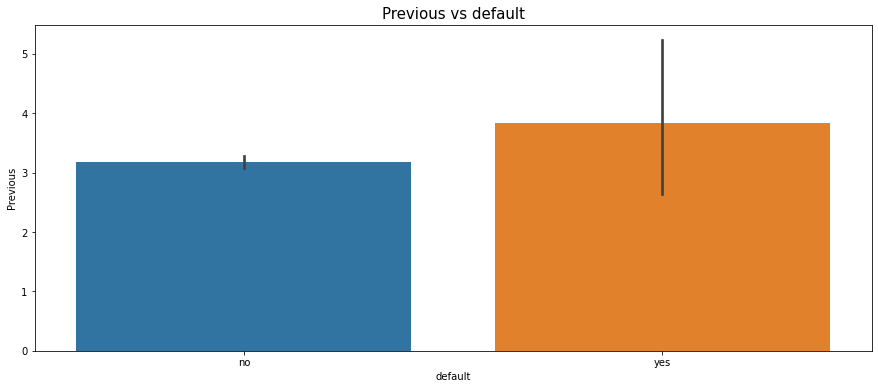

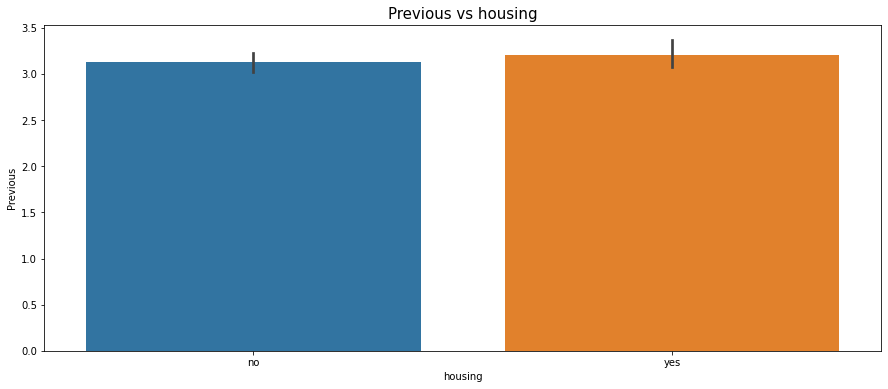

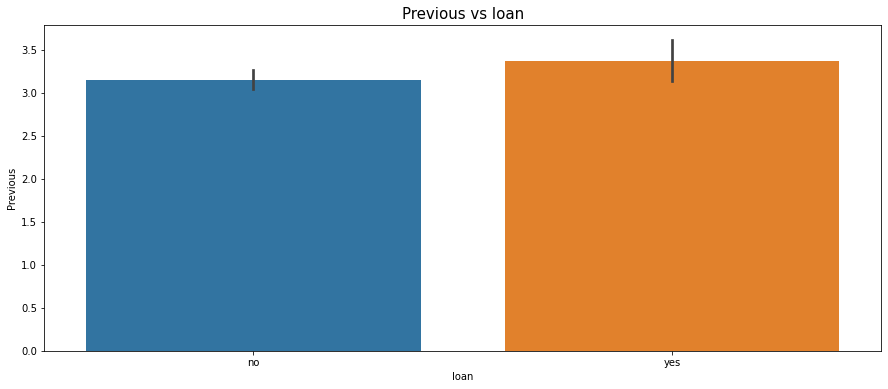

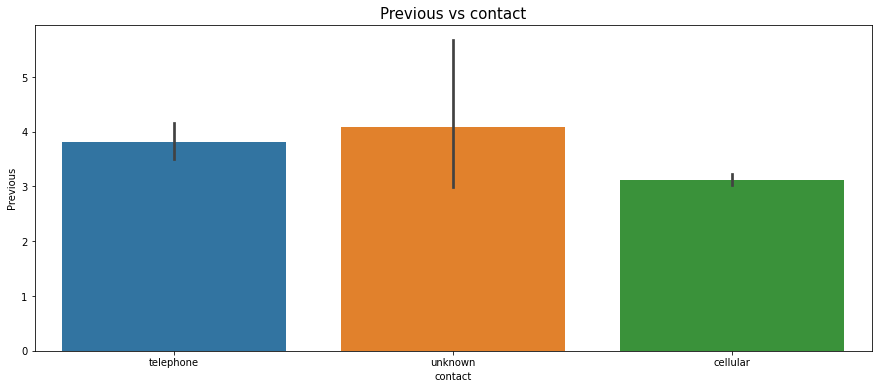

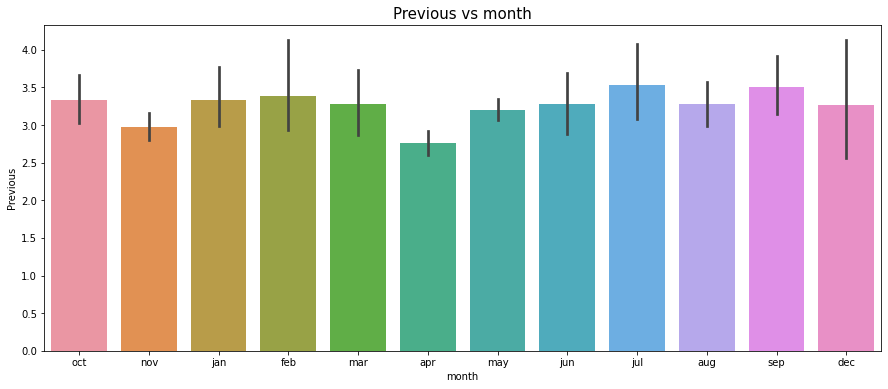

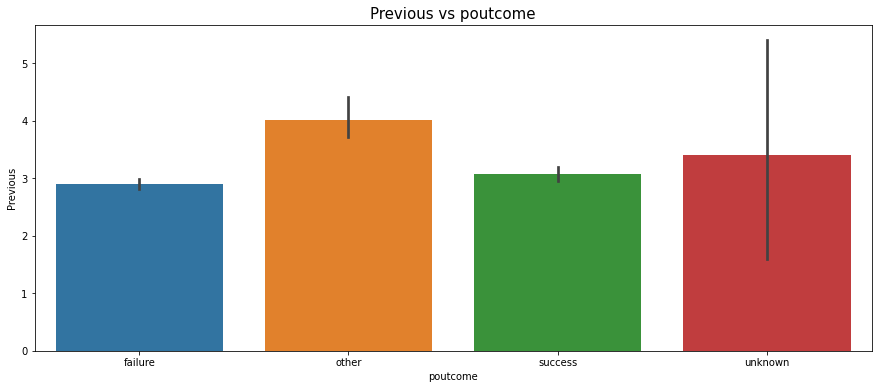

In [294]:
# Previous V/s Categorical Features
for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["previous"])
    plt.title("Previous vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Previous",fontsize=10)
    plt.show()

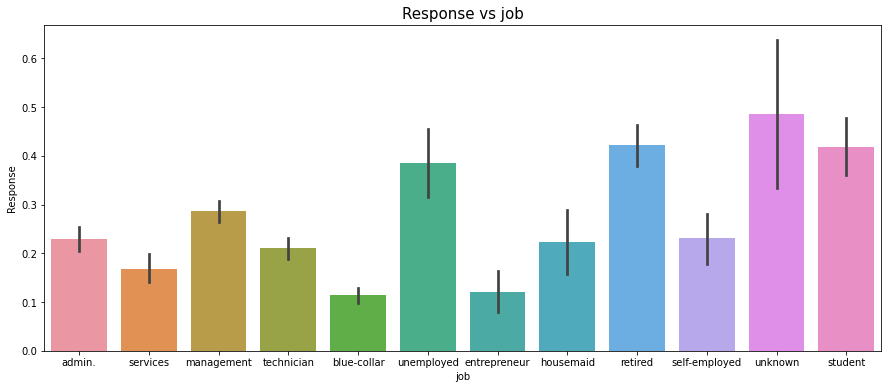

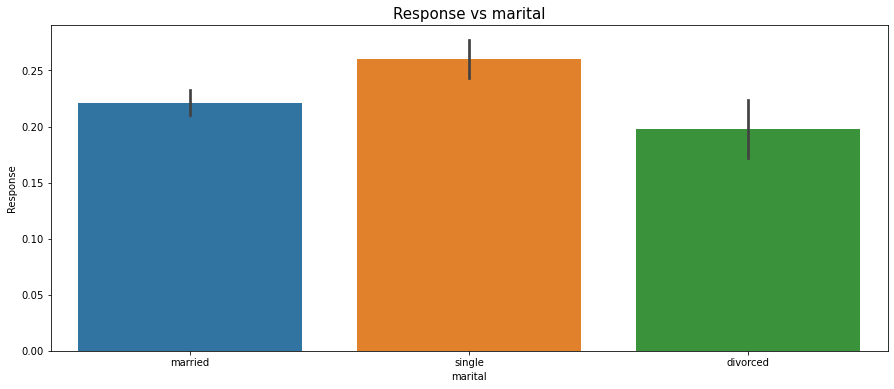

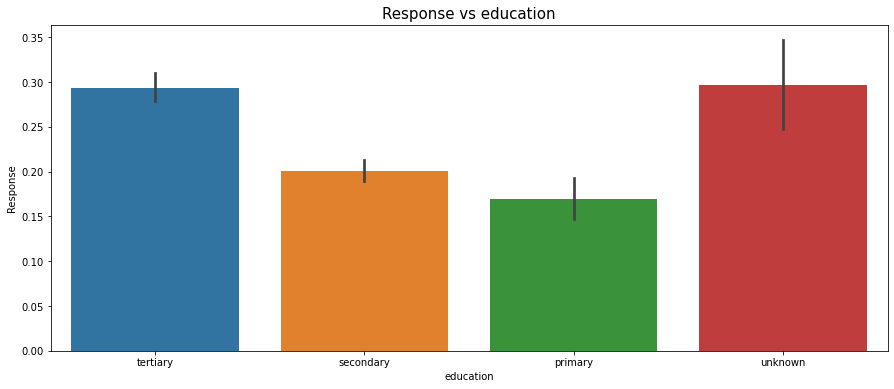

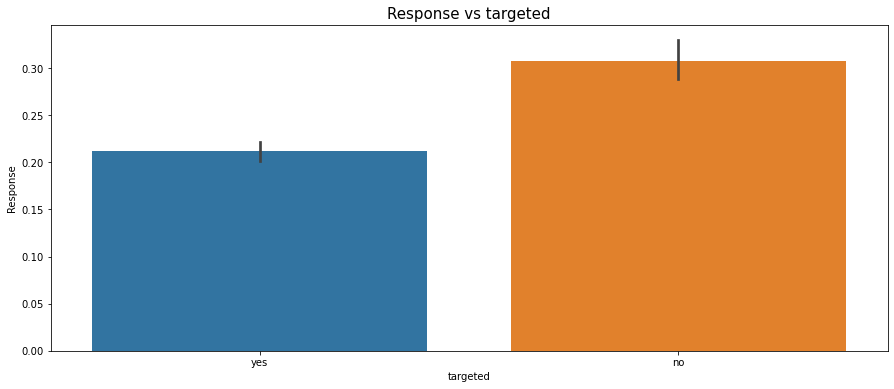

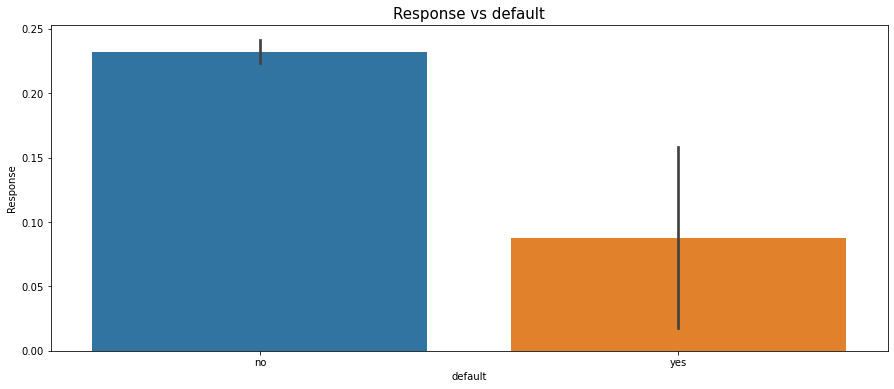

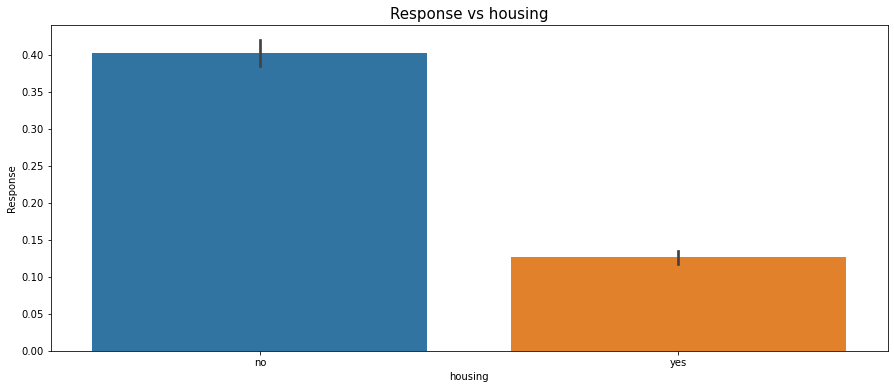

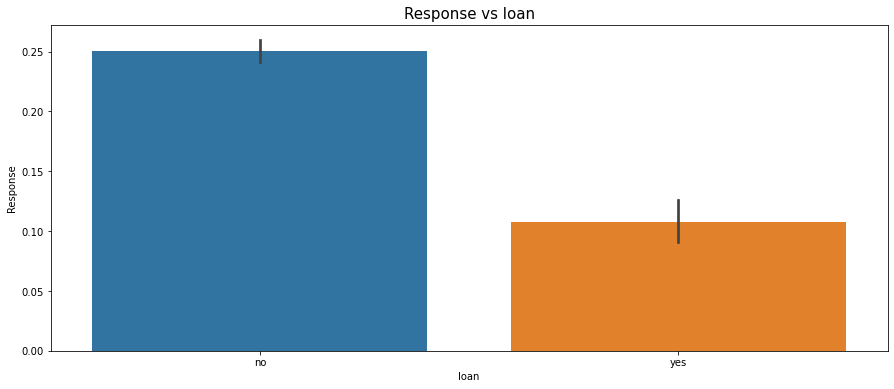

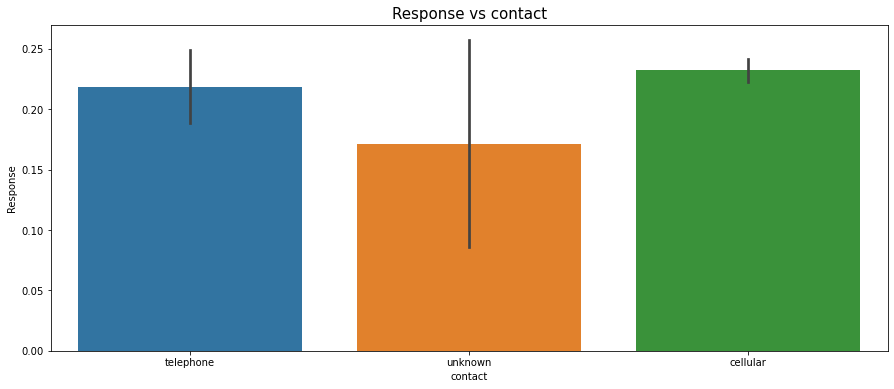

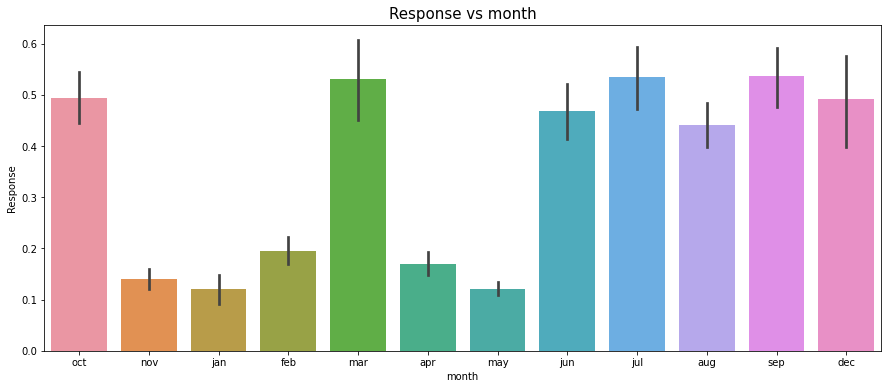

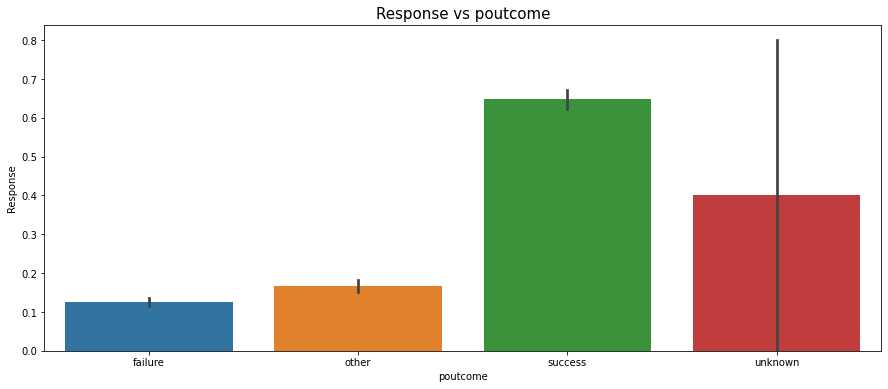

In [295]:
# Response V/s Categorical Features

for col in obj[:]:
    plt.figure(figsize=(15,6))
    sns.barplot(x= df[col],y= df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

### Are the features about the previous campaign data useful?
### Are pdays and poutcome associated with the target? 

<Figure size 720x576 with 0 Axes>

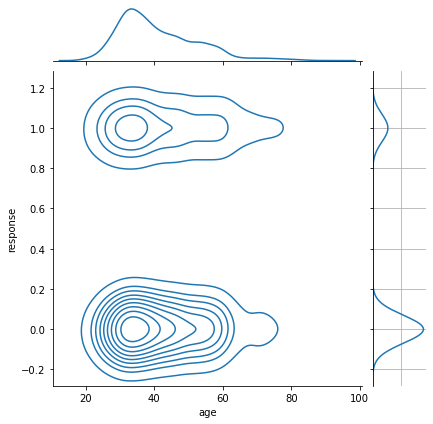

<Figure size 720x576 with 0 Axes>

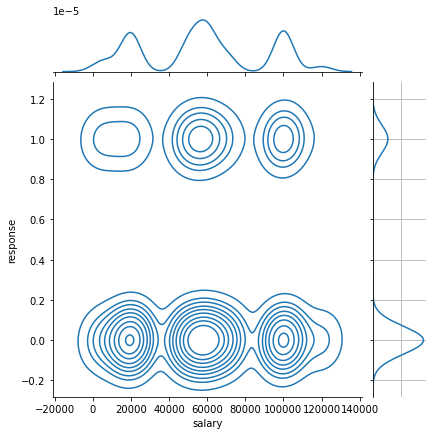

<Figure size 720x576 with 0 Axes>

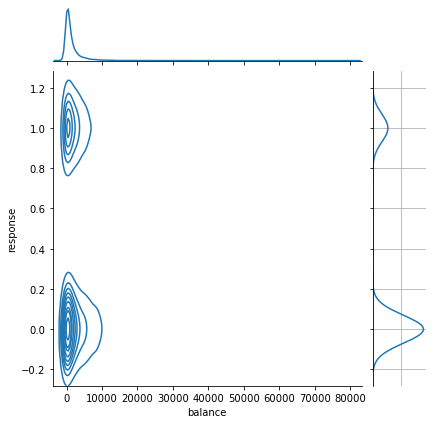

<Figure size 720x576 with 0 Axes>

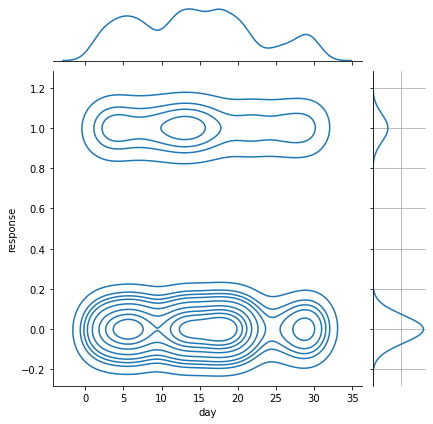

<Figure size 720x576 with 0 Axes>

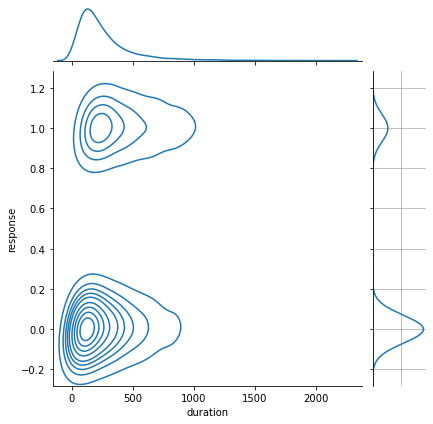

<Figure size 720x576 with 0 Axes>

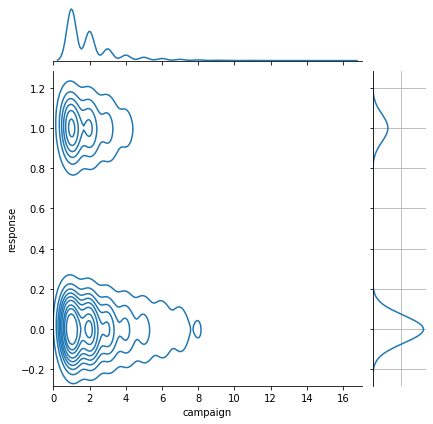

<Figure size 720x576 with 0 Axes>

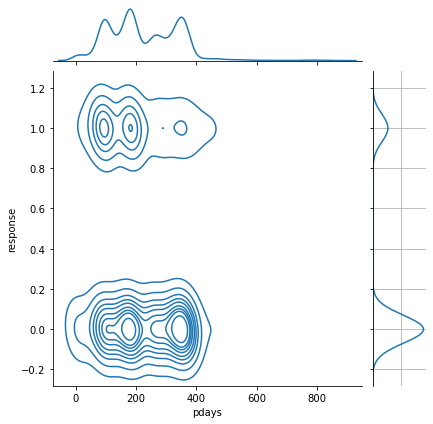

<Figure size 720x576 with 0 Axes>

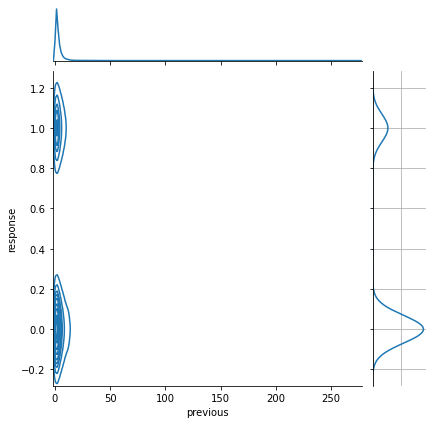

In [296]:
# Target Variable(response) v/s all Numerical Features
for col in num[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[col],y = df["response"],kind='kde')
    #plt.xlabel(col,fontsize = 15)
    #plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()
    
    #"scatter" | "kde" | "hist" | "hex" | "reg" | "resid"

### Observation:-
    * Previous Campaign Data(pdays) is +vely correled with our Target Variable & is useful.
    * pdays has + ve Correlation with Target Variable(Respomse)
    * poutcome also has significant association with Target Variable(Response)

###  How do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.
    * We have droped the -1 values from pdays Column.
    * We have sufficient tata for training and testing after removing the -1 pdays records.

### The necessary transformations for the categorical variables and the numeric variables.

In [96]:
# Job(Categorical) to Numerical using Map Function

df['job'] = df['job'].map({'blue-collar':1, 
                           'entrepreneur':2, 
                           'housemaid':3, 
                           'services':4, 
                           'technician':5, 
                           'self-employed':6, 
                           'unknown': 7, 
                           'admin.':8, 
                           'management':9, 
                           'unemployed':10, 
                           'retired':11, 
                           'student':12})

# Marital(Categorical) to Numerical using Map Function
df['marital'] = df['marital'].map({'married':1, 'divorced':2, 'single':3})

# Education(Categorical) to Numerical using Map Function
df['education'] = df['education'].map({'primary':1, 'secondary':2, 'unknown':3, 'tertiary':4})

# Targeted(Categorical)- yes/no to 1/0 using Map Function
df['targeted'] = df['targeted'].map({'yes':1, 'no':0})

# Default(Categorical)- yes/no to 1/0 using Map Function
df['default'] = df['default'].map({'yes':1, 'no':0})

# Housing(Categorical)- yes/no to 1/0 using Map Function
df['housing'] = df['housing'].map({'yes':1, 'no':0})

# Loan(Categorical)- yes/no to 1/0 using Map Function
df['loan'] = df['loan'].map({'yes':1, 'no':0})

# Contact(Categorical)- Numerical using Map Function
df['contact'] = df['contact'].map({'unknown':1, 'telephone':2, 'cellular':3})

# Month(Categorical) - Numerical using Label Encoding

#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creating instance for LabelEncoder
labelencoder= LabelEncoder()

# Assigning Numerical Value to month column
df['month']= labelencoder.fit_transform(df['month'])

# Poutcome(Categorical)- Numerical using Map Function
df['poutcome'] = df['poutcome'].map({'unknown':1, 'failure':2, 'other':3, 'success':4})

In [11]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,8,50000,1,4,1,0,882,0,0,2,21,10,39,1,151,3,2,0
24062,42,8,50000,3,2,1,0,-247,1,1,2,21,10,519,1,166,1,3,1
24064,33,4,70000,1,2,1,0,3444,1,0,2,21,10,144,1,91,4,2,1
24072,36,9,100000,1,4,1,0,2415,1,0,2,22,10,73,1,86,4,3,0
24077,36,9,100000,1,4,1,0,0,1,0,2,23,10,140,1,143,3,2,1


In [97]:
df1= df.copy()

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        8257 non-null   int64
 1   job        8257 non-null   int64
 2   salary     8257 non-null   int64
 3   marital    8257 non-null   int64
 4   education  8257 non-null   int64
 5   targeted   8257 non-null   int64
 6   default    8257 non-null   int64
 7   balance    8257 non-null   int64
 8   housing    8257 non-null   int64
 9   loan       8257 non-null   int64
 10  contact    8257 non-null   int64
 11  day        8257 non-null   int64
 12  month      8257 non-null   int32
 13  duration   8257 non-null   int64
 14  campaign   8257 non-null   int64
 15  pdays      8257 non-null   int64
 16  previous   8257 non-null   int64
 17  poutcome   8257 non-null   int64
 18  response   8257 non-null   int64
dtypes: int32(1), int64(18)
memory usage: 1.2 MB


### Handle variables corresponding to the previous campaign - pdays
    ➡ pdays(number of days passed after the client was last contacted from a previous campaign)- Already Removed
    ➡ previous(number of contacts performed before this campaign)- 
    ➡ poutcome (outcome of the previous campaign: 'failure','nonexistent','success')- Converted to Numerical.

###  Train test split

In [98]:
# Split the Data into Feature(x) & Target(y)
x= df.drop(columns='response')
y= df['response']

In [99]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the Dataset into Train & Test set
x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y, 
                                                   test_size=0.33, 
                                                   random_state=1)

In [100]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_scaled= sc.fit_transform(x_train)
x_test_scaled= sc.fit_transform(x_test)

# Predictive model 1: Logistic regression
    - Make a predictive model using logistic regression
    - Use RFE to select top n features in an automated fashion (choose n as you see fit)
    - Using p values and VIF, get rid of the redundant features
    - Estimate the model performance using k fold cross validation
    - What is the precision, recall, accuracy of your model?
    - Which features are the most important from your model?

##### Make a predictive model using logistic regression

In [101]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Defining the model
logmodel = LogisticRegression()

# Training the model with Scaling
lgmodel=logmodel.fit(x_train_scaled, y_train)

In [102]:
# Prediction with scaled x_test
Pred= lgmodel.predict(x_test_scaled)

In [103]:
# Variation in Predicted Class
pd.Series(Pred).value_counts()

0    2261
1     464
dtype: int64

### Observation:-
    We have Imbalance Dataset.

In [104]:
# Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2138
           1       0.69      0.54      0.61       587

    accuracy                           0.85      2725
   macro avg       0.78      0.74      0.76      2725
weighted avg       0.84      0.85      0.84      2725



In [105]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5532, 18), (2725, 18), (5532,), (2725,))

# Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [106]:
# Split the Dataset into Train & Test set
x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y, 
                                                   test_size=0.33, 
                                                   random_state=1)

In [107]:
# RFE to select top n features
from sklearn.feature_selection import RFE

# Import tree
from sklearn.ensemble import RandomForestClassifier    # RandomForestClassifier will be passed as one of the argument of RFE 
from sklearn.metrics import accuracy_score

# define the method
rfe = RFE(RandomForestClassifier(n_estimators=250, random_state=1, n_jobs=-1),n_features_to_select= 10)

# fit the model
rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=250, n_jobs=-1,
                                     random_state=1),
    n_features_to_select=10)

In [108]:
# All Features with their importance
rfe.get_support()

array([ True,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True])

In [109]:
# Selecting Our Important Features
features= x_train.columns[rfe.get_support()]
features

Index(['age', 'job', 'balance', 'housing', 'day', 'month', 'duration', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [110]:
# transform the data(to limited Features- only 10)
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [111]:
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

# Training the listic regression model with x_train_rfe(with 10 Features only)
rfe_model= logmodel.fit(x_train_rfe, y_train)

C:\Users\MADHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
# Prediction with x_test_rfe(with 10 Features only)
rfe_Predictions= rfe_model.predict(x_test_rfe)

In [113]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2138
           1       0.69      0.54      0.61       587

    accuracy                           0.85      2725
   macro avg       0.78      0.74      0.76      2725
weighted avg       0.84      0.85      0.84      2725



In [114]:
# Model Evaluation
print(classification_report(y_test,rfe_Predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2138
           1       0.59      0.43      0.50       587

    accuracy                           0.81      2725
   macro avg       0.72      0.67      0.69      2725
weighted avg       0.80      0.81      0.80      2725



# Observation:-
######    * RFE decreased Precision of Class(no)  by 3
######    * RFE decreased Precision of Class(yes)  by 10
######    * RFE decreased Recall of Class(no) by 1
######    * RFE decreased Recall of Class(yes)  by 11
######    * RFE decreased f1-score of Class(no)  by 3
######    * RFE decreased f1-score of Class(yes)  by 11

# Using p values to get rid of the redundant features.

In [115]:
x.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,8,50000,1,4,1,0,882,0,0,2,21,10,39,1,151,3,2
24062,42,8,50000,3,2,1,0,-247,1,1,2,21,10,519,1,166,1,3
24064,33,4,70000,1,2,1,0,3444,1,0,2,21,10,144,1,91,4,2
24072,36,9,100000,1,4,1,0,2415,1,0,2,22,10,73,1,86,4,3
24077,36,9,100000,1,4,1,0,0,1,0,2,23,10,140,1,143,3,2


In [116]:
# Split the Dataset into Train & Test set
x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y, 
                                                   test_size=0.30, 
                                                   random_state=42)

In [117]:
# Feature Scaling
x_train_scaled= sc.fit_transform(x_train)
x_test_scaled= sc.fit_transform(x_test)

In [118]:
y_train.head()

38442    0
41864    0
32028    1
36911    0
36253    0
Name: response, dtype: int64

In [119]:
# Using p values to know redundant features

# We will use statsmodel instead of sklearn- It gives us Summary Report 
import statsmodels.api as sm

# Adding Intercept(constant) manually.(Statsmodel calculates only coefficients)
x_train_sm= sm.add_constant(x_train)   # x_train_scaled:= since model will be built on the basis of ordinary least square

C:\Users\MADHU\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [120]:
# Fitting Training Data to Linear Regression using Ordinary Least Square from Statsmodel
lr= sm.OLS(y_train,x_train).fit()

In [121]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.465
Method:                 Least Squares   F-statistic:                              280.5
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        02:58:47   Log-Likelihood:                         -2147.3
No. Observations:                5779   AIC:                                      4331.
Df Residuals:                    5761   BIC:                                      4451.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Observation_1:- When Redundant Feature were not eliminated by using VIF
    * p-value > p(threashold)
        salary= 0.123
        education= 0.546
        default= 0.684    
        day= 0.953
        month= 0.992
        pdays= 0.750
        previous= 0.743
    * We will look into these Features after Checking Variance Inflation Factor(VIF)

##### Using VIF to get rid of the redundant features.

In [122]:
# Using VIF to get rid of the redundant features.

# Library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating Function to generate Variance Inflation Factor(VIF) Dataframe

def calculate_vif(dataset):
    vif= pd.DataFrame()
    vif['features']= dataset.columns
    vif['VIF_Values']= [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return(vif)

In [123]:
x.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,8,50000,1,4,1,0,882,0,0,2,21,10,39,1,151,3,2
24062,42,8,50000,3,2,1,0,-247,1,1,2,21,10,519,1,166,1,3
24064,33,4,70000,1,2,1,0,3444,1,0,2,21,10,144,1,91,4,2
24072,36,9,100000,1,4,1,0,2415,1,0,2,22,10,73,1,86,4,3
24077,36,9,100000,1,4,1,0,0,1,0,2,23,10,140,1,143,3,2


In [125]:
# Variance inflation factor
calculate_vif(x)

,features,VIF_Values
0,age,14.373488
1,job,5.917960
2,salary,6.398819
3,marital,6.400704
4,education,13.507185
5,targeted,8.301863
6,default,1.014803
7,balance,1.316114
8,housing,3.439812
9,loan,1.198239


### Observations:-
    * VIF values > 5 < 10:- VIF tells us about how strong features are correlated with one another.
        job= 5.917960
        salary=	6.39
        marital= 6.40
        targeted= 8.30
        pdays= 5.361698
    VIF values > 10:
        contact- 46.78 
        age- 14.373
        education- 13.507
        poutcome= 12.574759

# Approach to deal with Redundant Features:-
    1. Lets Remove those Features which have P-Value > 0.1 & VIF > 7 by looking into Correlation.
                (education, default, day, month, pdays, previous, targeted, contact, age, poutcome)
    2. Then check RFE.
    3. Then we will move to K-Fold Cross Validation for our Model Performance.

In [126]:
# Correlation
df.corr()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
age,1.000000,0.131434,0.058322,-0.396871,-0.135770,0.140750,-0.027825,0.115480,-0.179386,-0.008330,-0.166384,0.018399,0.013909,0.060519,0.003842,-0.107863,0.002280,0.052711,0.072577
job,0.131434,1.000000,0.356734,0.128893,0.386861,-0.218134,-0.022034,0.098513,-0.313121,-0.086777,-0.024450,0.021216,0.003045,0.040726,-0.054063,-0.200358,0.016383,0.150529,0.201062
salary,0.058322,0.356734,1.000000,-0.023469,0.522016,-0.228338,0.000361,0.066079,-0.035905,0.013788,0.035805,0.002379,0.019820,0.005734,-0.018559,-0.106134,0.028427,0.011593,0.036774
marital,-0.396871,0.128893,-0.023469,1.000000,0.146150,-0.466574,0.024151,-0.033172,-0.041531,-0.076804,0.044906,0.018930,0.005958,-0.009757,-0.007665,0.013981,-0.001461,0.049886,0.038213
education,-0.135770,0.386861,0.522016,0.146150,1.000000,-0.581323,-0.016337,0.090223,-0.128824,-0.042315,0.066135,0.019399,-0.003550,0.002254,-0.026095,-0.159350,0.011831,0.082847,0.112765
targeted,0.140750,-0.218134,-0.228338,-0.466574,-0.581323,1.000000,0.019593,-0.052007,0.087470,0.070420,-0.020464,-0.026179,0.010187,-0.014729,0.017948,0.075638,-0.001205,-0.073020,-0.091216
default,-0.027825,-0.022034,0.000361,0.024151,-0.016337,0.019593,1.000000,-0.045010,0.022644,0.052261,0.019834,-0.001013,0.020123,-0.002635,-0.002064,0.033760,0.012149,-0.025349,-0.028299
balance,0.115480,0.098513,0.066079,-0.033172,0.090223,-0.052007,-0.045010,1.000000,-0.109163,-0.085004,-0.030317,0.051732,0.015723,0.040998,-0.008150,-0.108122,0.001570,0.052290,0.076995
housing,-0.179386,-0.313121,-0.035905,-0.041531,-0.128824,0.087470,0.022644,-0.109163,1.000000,0.109815,0.069869,-0.066740,0.014452,-0.072070,0.063071,0.335124,0.008934,-0.283477,-0.317501
loan,-0.008330,-0.086777,0.013788,-0.076804,-0.042315,0.070420,0.052261,-0.085004,0.109815,1.000000,0.020904,0.007550,0.000524,-0.033874,0.007444,0.022454,0.016549,-0.105711,-0.115805


### Observations:-
    * age, salary, targeted, month, default, previous and contact significantly less correlated with Target(response).
    * Let's Drop age, salary, targeted, month, default, previous and contact & see the performance of RFE.

In [127]:
# Let's Drop 'age', 'salary', 'targeted', 'month', 'contact' & see the performance of p- value.

df= df.drop(['age', 'salary', 'default', 'targeted', 'month', 'contact', 'previous'], axis=1)

In [128]:
df.head()

,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,poutcome,response
24060,8,1,4,882,0,0,21,39,1,151,2,0
24062,8,3,2,-247,1,1,21,519,1,166,3,1
24064,4,1,2,3444,1,0,21,144,1,91,2,1
24072,9,1,4,2415,1,0,22,73,1,86,3,0
24077,9,1,4,0,1,0,23,140,1,143,2,1


In [129]:
# Split the Data into Feature(x) & Target(y)
x= df.drop(columns='response')
y= df['response']

In [130]:
x.head()

,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,poutcome
24060,8,1,4,882,0,0,21,39,1,151,2
24062,8,3,2,-247,1,1,21,519,1,166,3
24064,4,1,2,3444,1,0,21,144,1,91,2
24072,9,1,4,2415,1,0,22,73,1,86,3
24077,9,1,4,0,1,0,23,140,1,143,2


### Again using RFE to know the important features

In [131]:
# Split the Dataset into Train & Test set
x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y, 
                                                   test_size=0.33, 
                                                   random_state=1)

In [132]:
x_train.shape

(5532, 11)

In [133]:
# define the method
rfe2 = RFE(RandomForestClassifier(n_estimators=150, random_state=1, n_jobs=-1),n_features_to_select= 6)

In [134]:
# fit the model
rfe2.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=150, n_jobs=-1,
                                     random_state=1),
    n_features_to_select=6)

In [135]:
# All Features with their importance
rfe2.get_support()

array([ True, False, False,  True, False, False,  True,  True, False,
        True,  True])

In [136]:
# Selecting Our Important Features
features= x_train.columns[rfe2.get_support()]
print(features)
print('No. of Features selected =', len(features))

Index(['job', 'balance', 'day', 'duration', 'pdays', 'poutcome'], dtype='object')
No. of Features selected = 6


In [137]:
# transform the data(to limited Features- only 8)
x_train_rfe2 = rfe2.transform(x_train)
x_test_rfe2 = rfe2.transform(x_test)

In [138]:
# Feature Scaling using standarscalar
x_train_rfe2_scaled= sc.fit_transform(x_train_rfe2)
x_test_rfe2_scaled= sc.fit_transform(x_test_rfe2)

In [139]:
# Training the listic regression model with x_train_rfe(with 8 Features only)
rfe2_logmodel= logmodel.fit(x_train_rfe2_scaled, y_train)

In [140]:
# Prediction with x_test_rfe(with 10 Features only)
rfe2_Pred= rfe2_logmodel.predict(x_test_rfe2_scaled)

In [141]:
print(classification_report(y_test,Pred)) # Without scaled model

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2138
           1       0.69      0.54      0.61       587

    accuracy                           0.85      2725
   macro avg       0.78      0.74      0.76      2725
weighted avg       0.84      0.85      0.84      2725



In [142]:
# Model Evaluation Previous
print(classification_report(y_test,rfe_Predictions))  # Scaled model

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2138
           1       0.59      0.43      0.50       587

    accuracy                           0.81      2725
   macro avg       0.72      0.67      0.69      2725
weighted avg       0.80      0.81      0.80      2725



In [143]:
# Final Model Evaluation
print(classification_report(y_test,rfe2_Pred))  # Final Model

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2138
           1       0.68      0.55      0.60       587

    accuracy                           0.85      2725
   macro avg       0.78      0.74      0.75      2725
weighted avg       0.84      0.85      0.84      2725



### Observation:-
    We can see that Model Performance has increased.

### Let's  do K- Fold Cross Validation.

In [151]:
x= df[['job', 'balance', 'day', 'duration', 'pdays', 'poutcome']]
y= df['response']
print(x.shape)
print(y.shape)

(8257, 6)
(8257,)


In [152]:
x.head()

,job,balance,day,duration,pdays,poutcome
24060,8,882,21,39,151,2
24062,8,-247,21,519,166,3
24064,4,3444,21,144,91,2
24072,9,2415,22,73,86,3
24077,9,0,23,140,143,2


In [153]:
# Feature Scaling
x= pd.DataFrame(sc.fit_transform(x))

In [154]:
x.head(2)

,0,1,2,3,4,5
0,0.568282,-0.220520,0.847462,-0.940155,-0.637936,-0.753508
1,0.568282,-0.589425,0.847462,1.100715,-0.507883,0.527471


In [155]:
# Importing the KFold Library
from sklearn.model_selection import KFold

# Select your Model
model= rfe2_logmodel

# How many times training and testing will occur
kfold_validation= KFold(10)

In [156]:
# Import cross value score
from sklearn.model_selection import cross_val_score

# Calculate cross val replort
results= cross_val_score(model, x,y, cv=kfold_validation)

print(results)
print('The Minimum Accuracy of Model:',np.min(results))
print('The Maximum Accuracy of Model:',np.max(results))
print('The Mean Accuracy of Model:',np.mean(results))

[0.92251816 0.94915254 0.89709443 0.89225182 0.94915254 0.92372881
 0.76634383 0.62666667 0.63151515 0.65575758]
The Minimum Accuracy of Model: 0.6266666666666667
The Maximum Accuracy of Model: 0.9491525423728814
The Mean Accuracy of Model: 0.821418152469


### What is the precision, recall, accuracy of your model?

In [157]:
# Import accuracy_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

print('accuracy_score:',accuracy_score(y_test, rfe2_Pred))

print('recall_score:',recall_score(y_test, rfe2_Pred))

print('precision_score:', precision_score(y_test, rfe2_Pred))

accuracy_score: 0.846605504587156
recall_score: 0.545144804088586
precision_score: 0.6794055201698513


### Which features are the most important from your model?

Feature: 0, Score: 0.41950
Feature: 1, Score: 0.08461
Feature: 2, Score: 0.06224
Feature: 3, Score: 0.80762
Feature: 4, Score: -0.09899
Feature: 5, Score: 0.91268


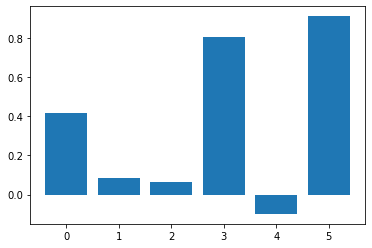

In [158]:
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = rfe2_logmodel
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Predictive model 2: Random Forest
    - Make a predictive model using random forest technique
    - Use not more than 50 trees, and control the depth of the trees to prevent overfitting
    - Estimate the model performance using k fold cross validation
    - What is the precision, recall, accuracy of your model?
    - Using the feature importance values from the Random Forest module, identify the most important features for the model

### Random Forest 
    Use Max 50 trees, and control the depth of the trees.

In [160]:
# Import the Important Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [161]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,8,50000,1,4,1,0,882,0,0,2,21,10,39,1,151,3,2,0
24062,42,8,50000,3,2,1,0,-247,1,1,2,21,10,519,1,166,1,3,1
24064,33,4,70000,1,2,1,0,3444,1,0,2,21,10,144,1,91,4,2,1
24072,36,9,100000,1,4,1,0,2415,1,0,2,22,10,73,1,86,4,3,0
24077,36,9,100000,1,4,1,0,0,1,0,2,23,10,140,1,143,3,2,1


In [162]:
df1.shape

(8257, 19)

In [163]:
# Split dataset in features & Target Variable
x1= df1.drop(columns= 'response')
y1= df1['response']

In [164]:
x1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,8,50000,1,4,1,0,882,0,0,2,21,10,39,1,151,3,2
24062,42,8,50000,3,2,1,0,-247,1,1,2,21,10,519,1,166,1,3
24064,33,4,70000,1,2,1,0,3444,1,0,2,21,10,144,1,91,4,2
24072,36,9,100000,1,4,1,0,2415,1,0,2,22,10,73,1,86,4,3
24077,36,9,100000,1,4,1,0,0,1,0,2,23,10,140,1,143,3,2


In [165]:
x1.dtypes

age          int64
job          int64
salary       int64
marital      int64
education    int64
targeted     int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [166]:
# Split dataset into Training Set & Test Set
x_train_1, x_test_1, y_train_1, y_test_1= train_test_split(x1,
                                                           y1,
                                                           test_size=0.3,
                                                           random_state=1)

In [167]:
# Create the Random Forest Classifier
rf= RandomForestClassifier(n_estimators=50,             # n_estimators=45 simply builds 45 tress(by default 100 trees are grown)
                                    max_depth=5,
                                    min_samples_leaf=5,
                                    max_features=5) 

# Train the Model
rf.fit(x_train_1,y_train_1)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=5,
                       n_estimators=50)

In [168]:
# Predict from Updated Model
rf_pred= rf.predict(x_test_1)

In [169]:
# Calculate Model Accuracy
print('Model Accuracy: ', accuracy_score(y_test_1,rf_pred))

Model Accuracy:  0.8547215496368039


### - Estimate the model performance using k fold cross validation

In [170]:
# Select your Model
model= rf

# How many times training and testing will occur
kfold_validation= KFold(10)

In [171]:
# Calculate cross val replort
results= cross_val_score(model, x1,y1, cv=kfold_validation)

print(results)
print('The Minimum Accuracy of Model:',np.min(results))
print('The Maximum Accuracy of Model:',np.max(results))
print('The Mean Accuracy of Model:',np.mean(results))

[0.92857143 0.94673123 0.89830508 0.89225182 0.93341404 0.92736077
 0.77360775 0.66181818 0.65212121 0.71272727]
The Minimum Accuracy of Model: 0.6521212121212121
The Maximum Accuracy of Model: 0.9467312348668281
The Mean Accuracy of Model: 0.8326908797417273


### - What is the precision, recall, accuracy of your model?

In [172]:
print('accuracy_score:',accuracy_score(y_test_1, rf_pred))

print('recall_score:',recall_score(y_test_1, rf_pred))

print('precision_score:', precision_score(y_test_1, rf_pred))

accuracy_score: 0.8547215496368039
recall_score: 0.48141263940520446
precision_score: 0.7617647058823529


### - Using the feature importance values from the Random Forest module, identify the most important features for the model

In [173]:
# Feature Importance
feature_importance_df= pd.DataFrame({'feature': list(x1.columns),
                                    'importance': rf.feature_importances_}).sort_values('importance', ascending= False)

feature_importance_df

,feature,importance
17,poutcome,0.391349
13,duration,0.280847
8,housing,0.104816
15,pdays,0.098508
12,month,0.030589
1,job,0.023197
0,age,0.018155
7,balance,0.013465
11,day,0.012772
2,salary,0.006863


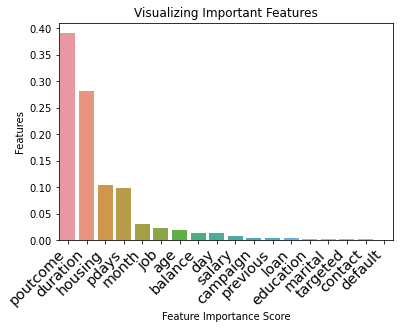

In [174]:
# Visualize Important Features

# Creating a Bar Plot
sns.barplot(x= feature_importance_df.feature, y= feature_importance_df.importance)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.xticks(rotation= 45, horizontalalignment= 'right', fontweight= 'light', fontsize= 'x-large')

plt.show()

# Compare the performance of the Random Forest and the logistic model :

## - Evaluate both models on the test set
#### * Logistic Regression:- accuracy_score: 0.84, recall_score: 0.54 & precision_score: 0.67
   
#### * Decision Tree:- accuracy_score: 0.85, recall_score: 0.51 & precision_score: 0.76  

# Overall Performance of Decision Tree is Satisfactory

## - Which metric did you choose and why?
#### * 	job, balance, day, duration, pdays & poutcome
##### I have choosen these features because:
    * They retain the magnitude of variability of othe non-important features.
    * They are Correlated with the target variable.
    * They are obtained from RFE(Recursive Feature Elimination) after doing multiple p-value test and VIF(Variance 
        Inflation Factor) 

## - Which model has better performance on the test set? 
#### * Decision Tree seems to be giving better Performance but not very much.

## - Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

Feature: 0, Score: 0.41950
Feature: 1, Score: 0.08461
Feature: 2, Score: 0.06224
Feature: 3, Score: 0.80762
Feature: 4, Score: -0.09899
Feature: 5, Score: 0.91268


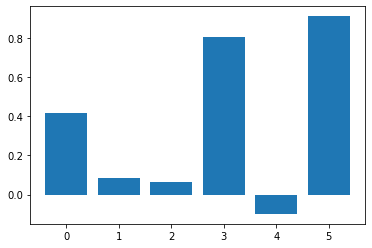

In [175]:
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = rfe2_logmodel
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

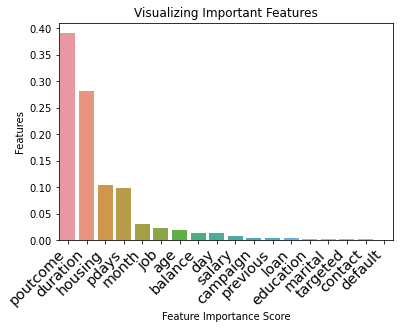

In [176]:
# Visualize Important Features

# Creating a Bar Plot
sns.barplot(x= feature_importance_df.feature, y= feature_importance_df.importance)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.xticks(rotation= 45, horizontalalignment= 'right', fontweight= 'light', fontsize= 'x-large')

plt.show()

# Yes, the top Features are similar in both the Models.